# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 7.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [2]:
!pip install folium

In [3]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [5]:
!gdown --id "1hHlr5uMu-WYIO4TFv5ZHjaQTtI4iMRMc" -O kaggle.json

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hHlr5uMu-WYIO4TFv5ZHjaQTtI4iMRMc
To: /content/kaggle.json
100% 71.0/71.0 [00:00<00:00, 242kB/s]


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 664 ~/.kaggle/kaggle.json

In [7]:
!pip install kaggle

In [8]:
!kaggle competitions download -c nyc-taxi-trip-duration --force

 87% 75.0M/85.8M [00:01<00:00, 60.9MB/s]
100% 85.8M/85.8M [00:01<00:00, 71.5MB/s]


In [9]:
!unzip nyc-taxi-trip-duration.zip

Archive:  nyc-taxi-trip-duration.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               


In [10]:
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               


In [11]:
df = pd.read_csv('train.csv')

In [12]:
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [13]:
df.drop(columns=['dropoff_datetime'], inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

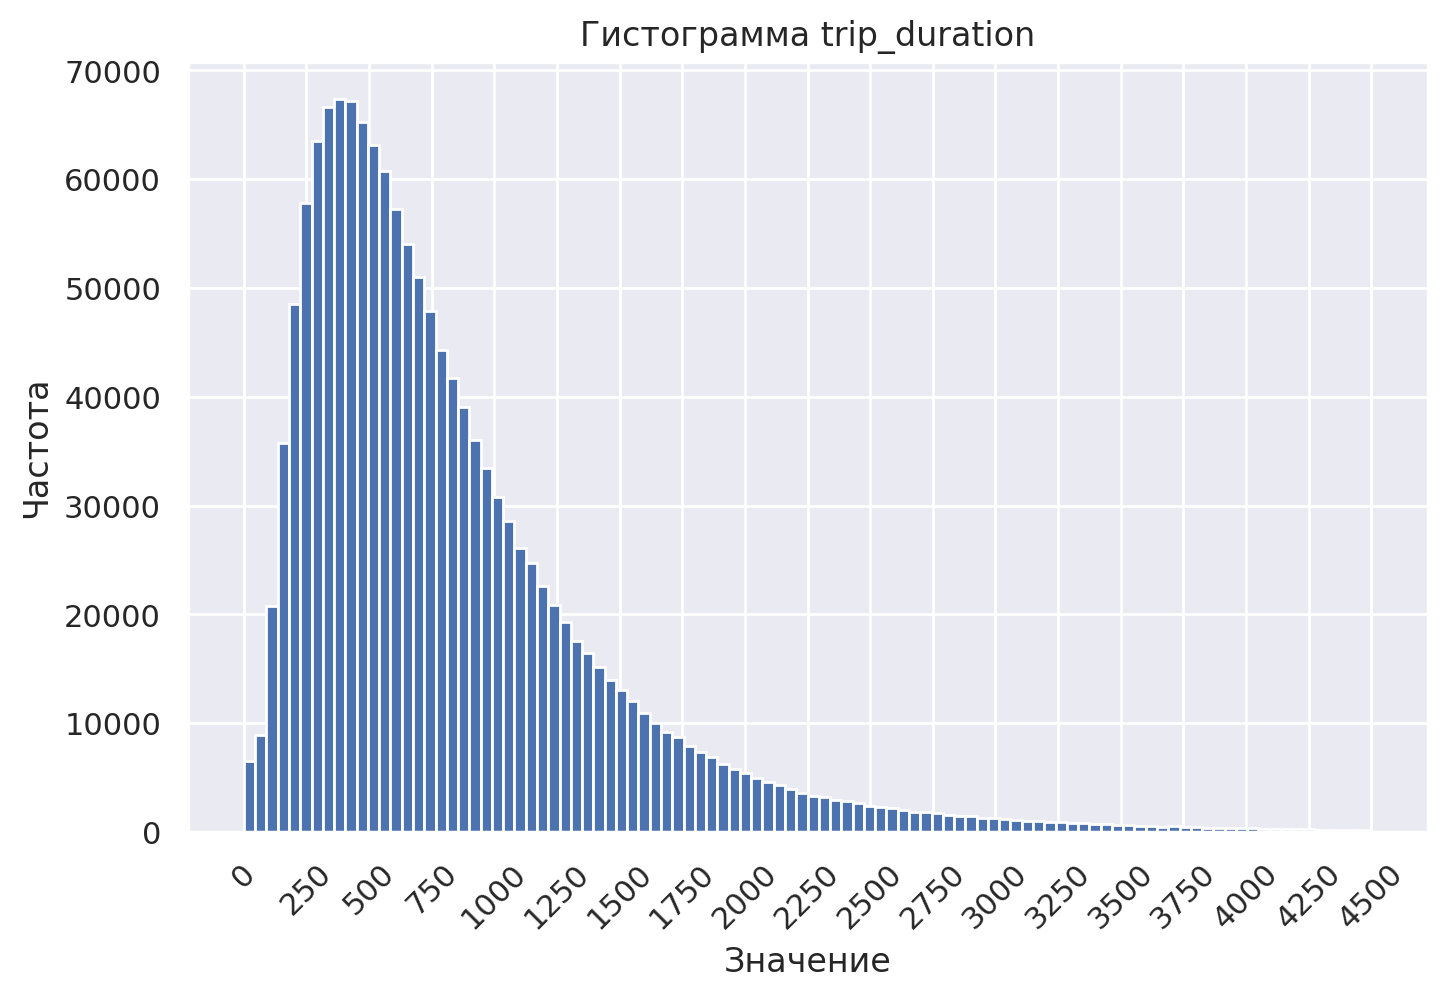

In [16]:
plt.title('Гистограмма trip_duration')
plt.hist(df['trip_duration'], bins=100, range = (0, 4500))
plt.xticks(list(range(0, 4501, 250)), rotation = 45)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Чаще всего встречается значение ~500 секунд, причем от нуля до этого значения частота растет логарифмически и потом нелинейно падает.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE более чувствителен на маленьких значениях целевой переменной и смегчает влияние выбросов.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

Запишем по определению RMSLE для модели $a$ :
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \hat{a}\big)^2}$$

т.к. $\exp(\hat{y}_i) = y_i + 1$

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}\big)^2} \sim \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}\big)^2 = \text{MSE}(X,\hat{y},\hat{a})$$
ч.т.д.


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [17]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

In [18]:
# Не удаляю т.к. нужно в последующих заданиях
# df.drop(columns=['trip_duration'], inplace=True)

In [19]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  log_trip_duration  
0               40.765602                  N            455           6.122493  
1               40.731152                  N            663           6.498282  
2               40.710087                  N           2124           7.661527  
3               40.706718                  N            429           6.063785  
4               40.782520                  N            435           6.077642  
...                   ...                ...            ...                ...  
1458639         40.740170                  N            778           6.658011  
1458640         40.796547                  N            655           6.486161  
1458641         40.707371                  N            764           6.639876  
1458642         40.757107                  N            373           5.924256  
1458643         40.790585                  N            198           5.293305  

[1458644 rows x 11 columns]

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [20]:
def rmsle(log1p_y_true, log1p_y_pred):
    df = log1p_y_true - log1p_y_pred
    return np.sqrt(np.mean(df * df))
print(np.mean(df['log_trip_duration']))
rmsle_best_const = rmsle(df['log_trip_duration'], np.mean(df['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

6.466978409297406
0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

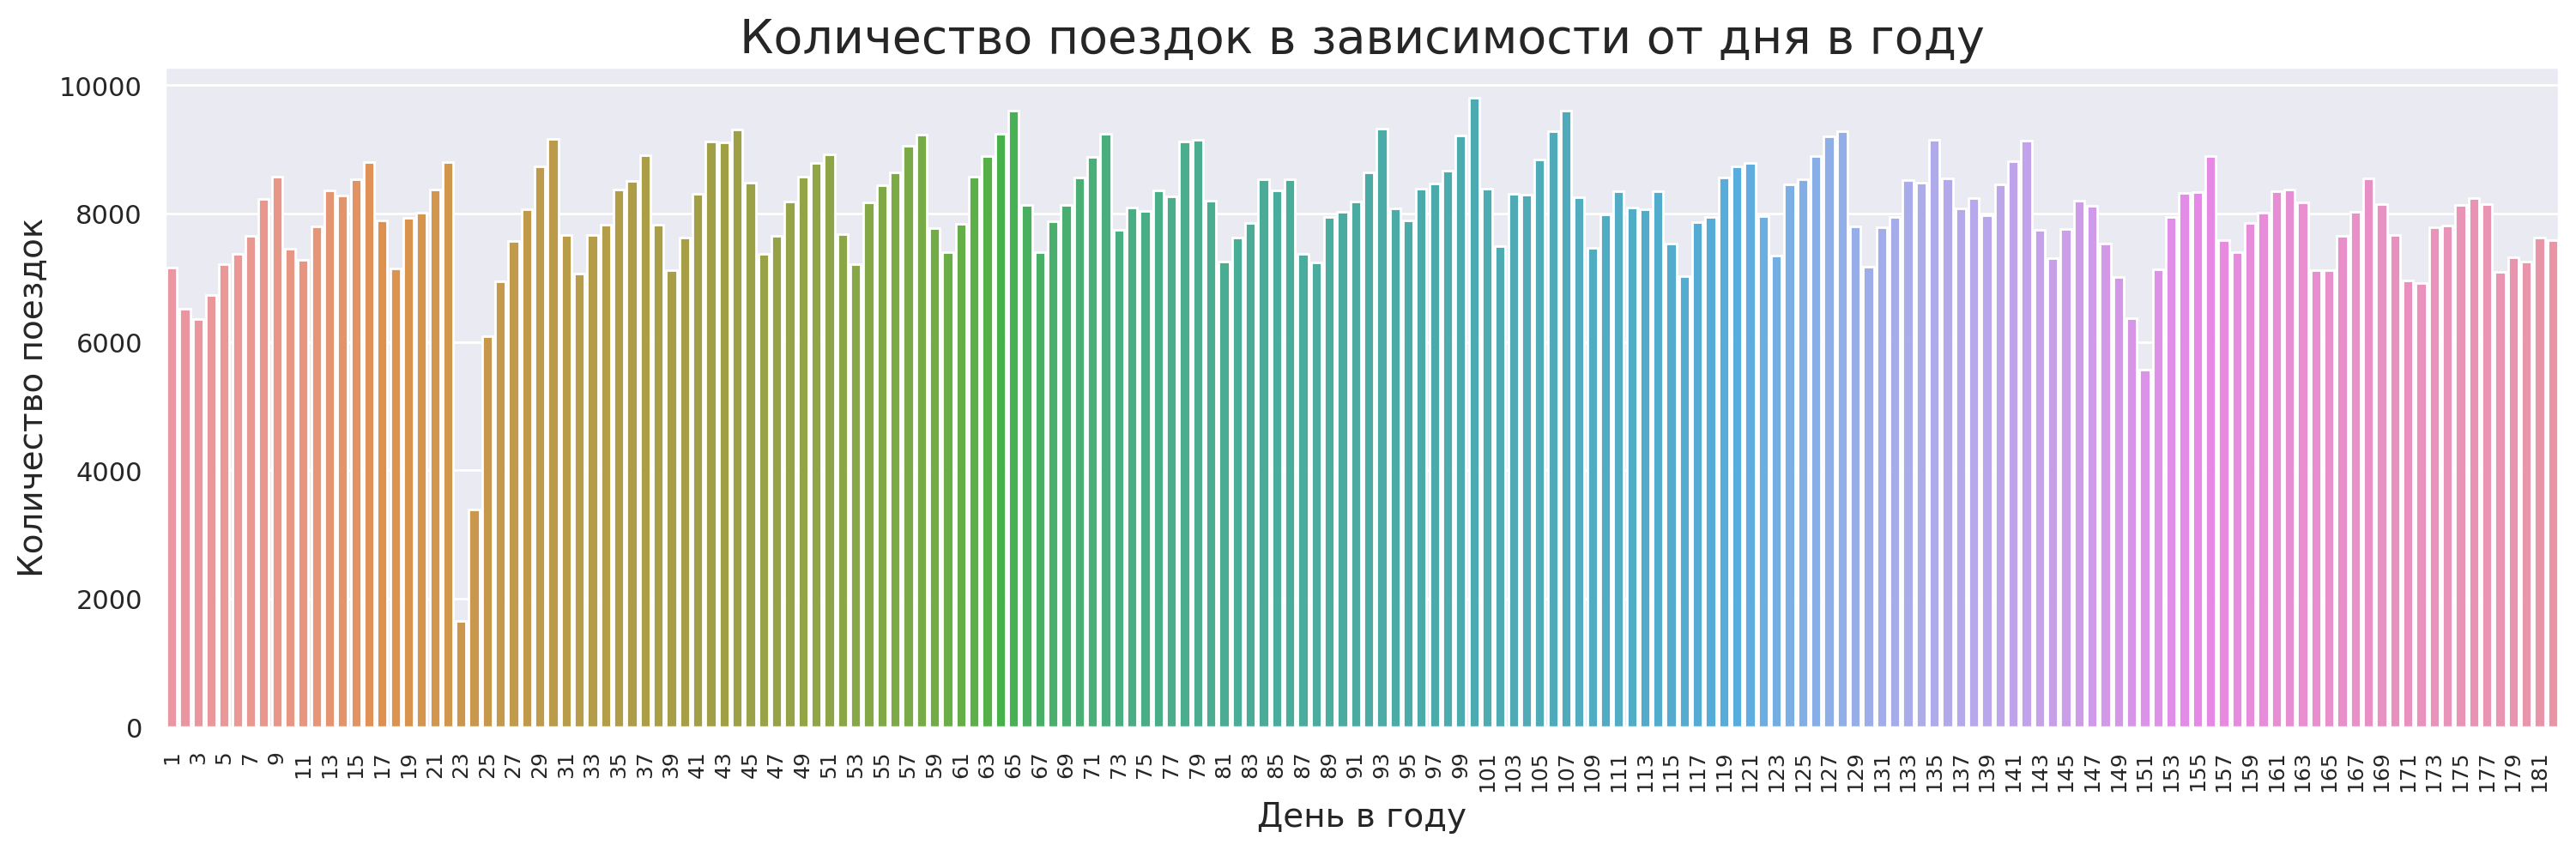

In [21]:
plt.figure(figsize=(18, 5))

df['pickup_day_of_year'] = df['pickup_datetime'].dt.dayofyear

sns.countplot(x='pickup_day_of_year', data=df)

plt.xlabel('День в году', fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок в зависимости от дня в году', fontsize=20)

plt.xticks(list(range(0, 182, 2)), rotation = 90, fontsize=9)

plt.show()

23 день - 23 января 2016 года


Запрет движения из-за снежной бури: https://ria.ru/20160123/1364032228.html

151 день - 31 мая 2016 года

Стрельба: https://tass.ru/proisshestviya/3324970


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

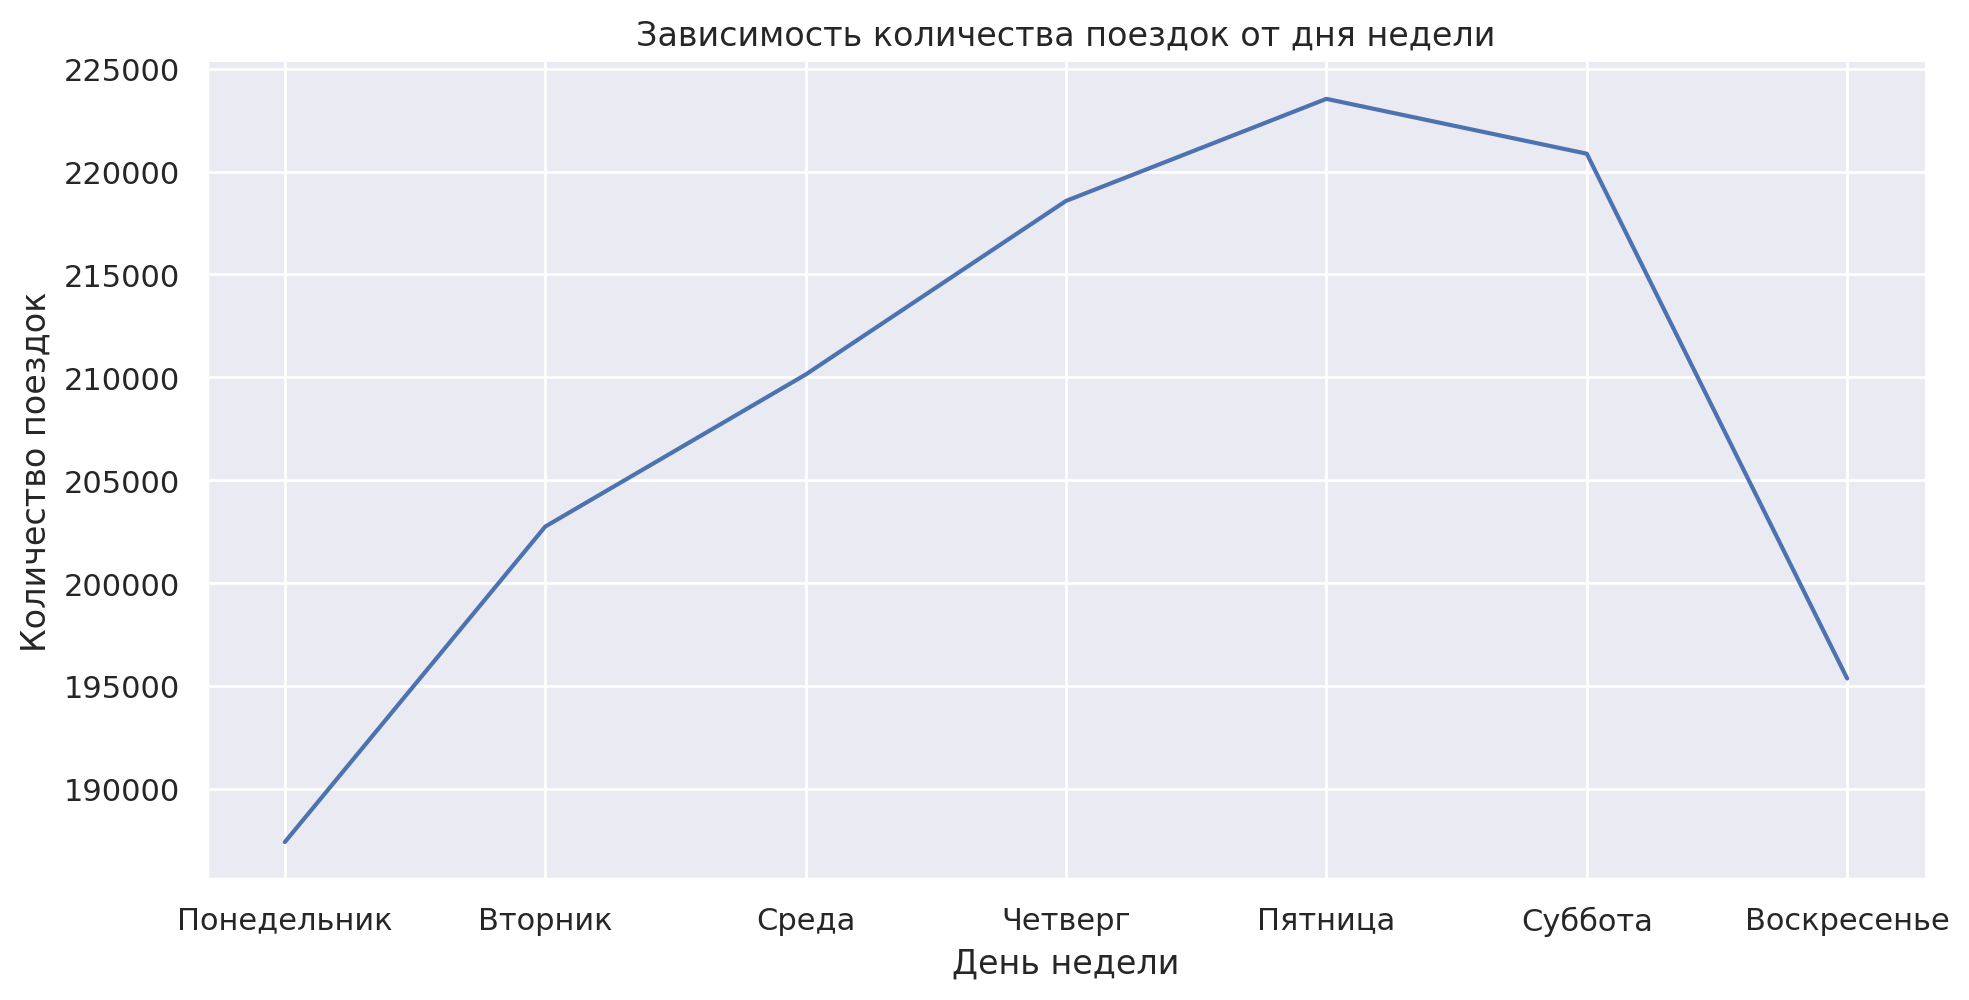

In [22]:
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek

counts = df.groupby('pickup_day').size().reset_index(name='value')

#Map используется чтобы переименовать конечно число полей (7 дней недели)
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
counts['pickup_day'] = counts['pickup_day'].map(lambda x: days[x])




sns.relplot(x='pickup_day', y='value', data=counts, kind='line', height = 5, aspect = 2)

plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от дня недели')


plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

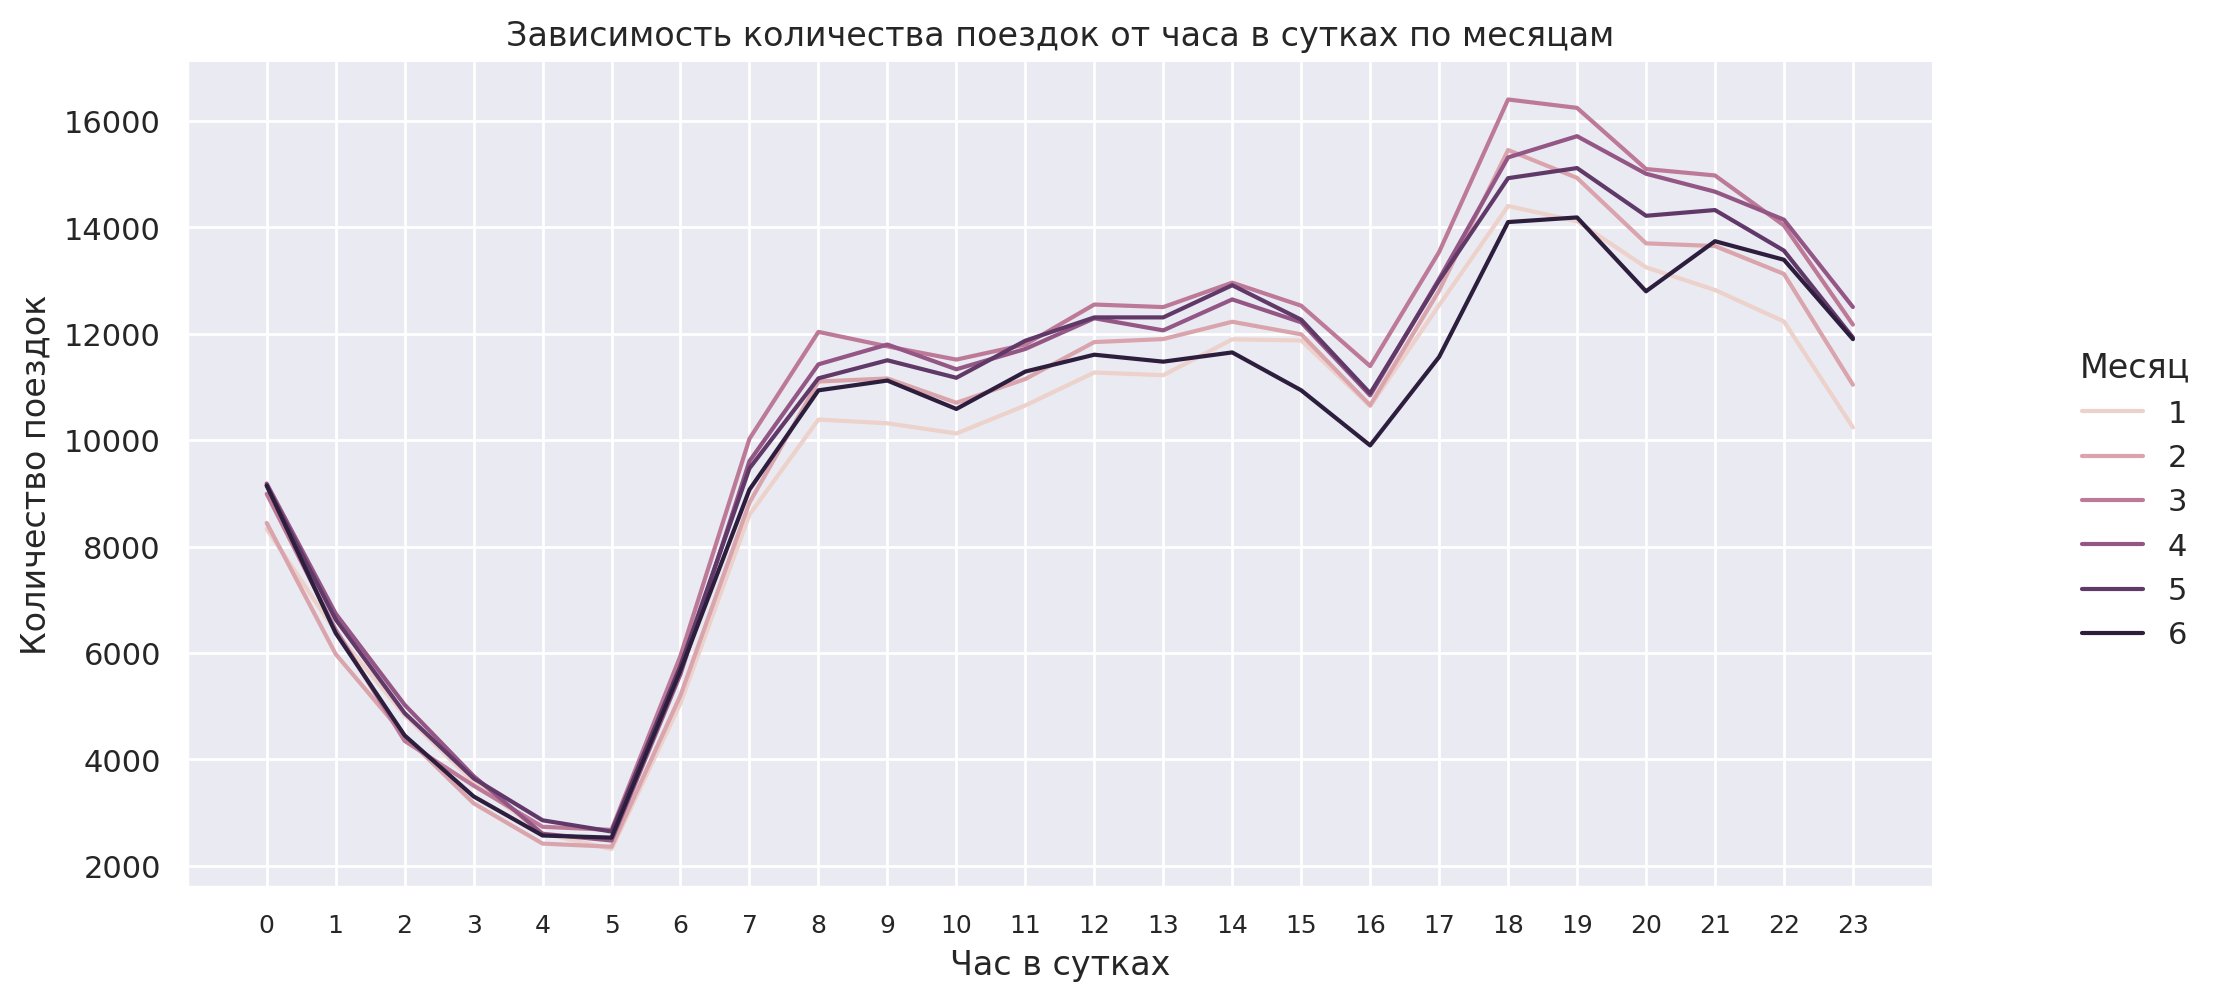

In [23]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_month'] = df['pickup_datetime'].dt.month

hour_counts_by_month = df.groupby(['pickup_month', 'pickup_hour']).size().reset_index(name='value')

graph = sns.relplot(x='pickup_hour', y='value', hue='pickup_month', data=hour_counts_by_month, kind='line', height = 5, aspect = 2)

graph._legend.set_title("Месяц")

plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от часа в сутках по месяцам')
plt.xticks(list(range(0, 24)), fontsize=9)

plt.show()

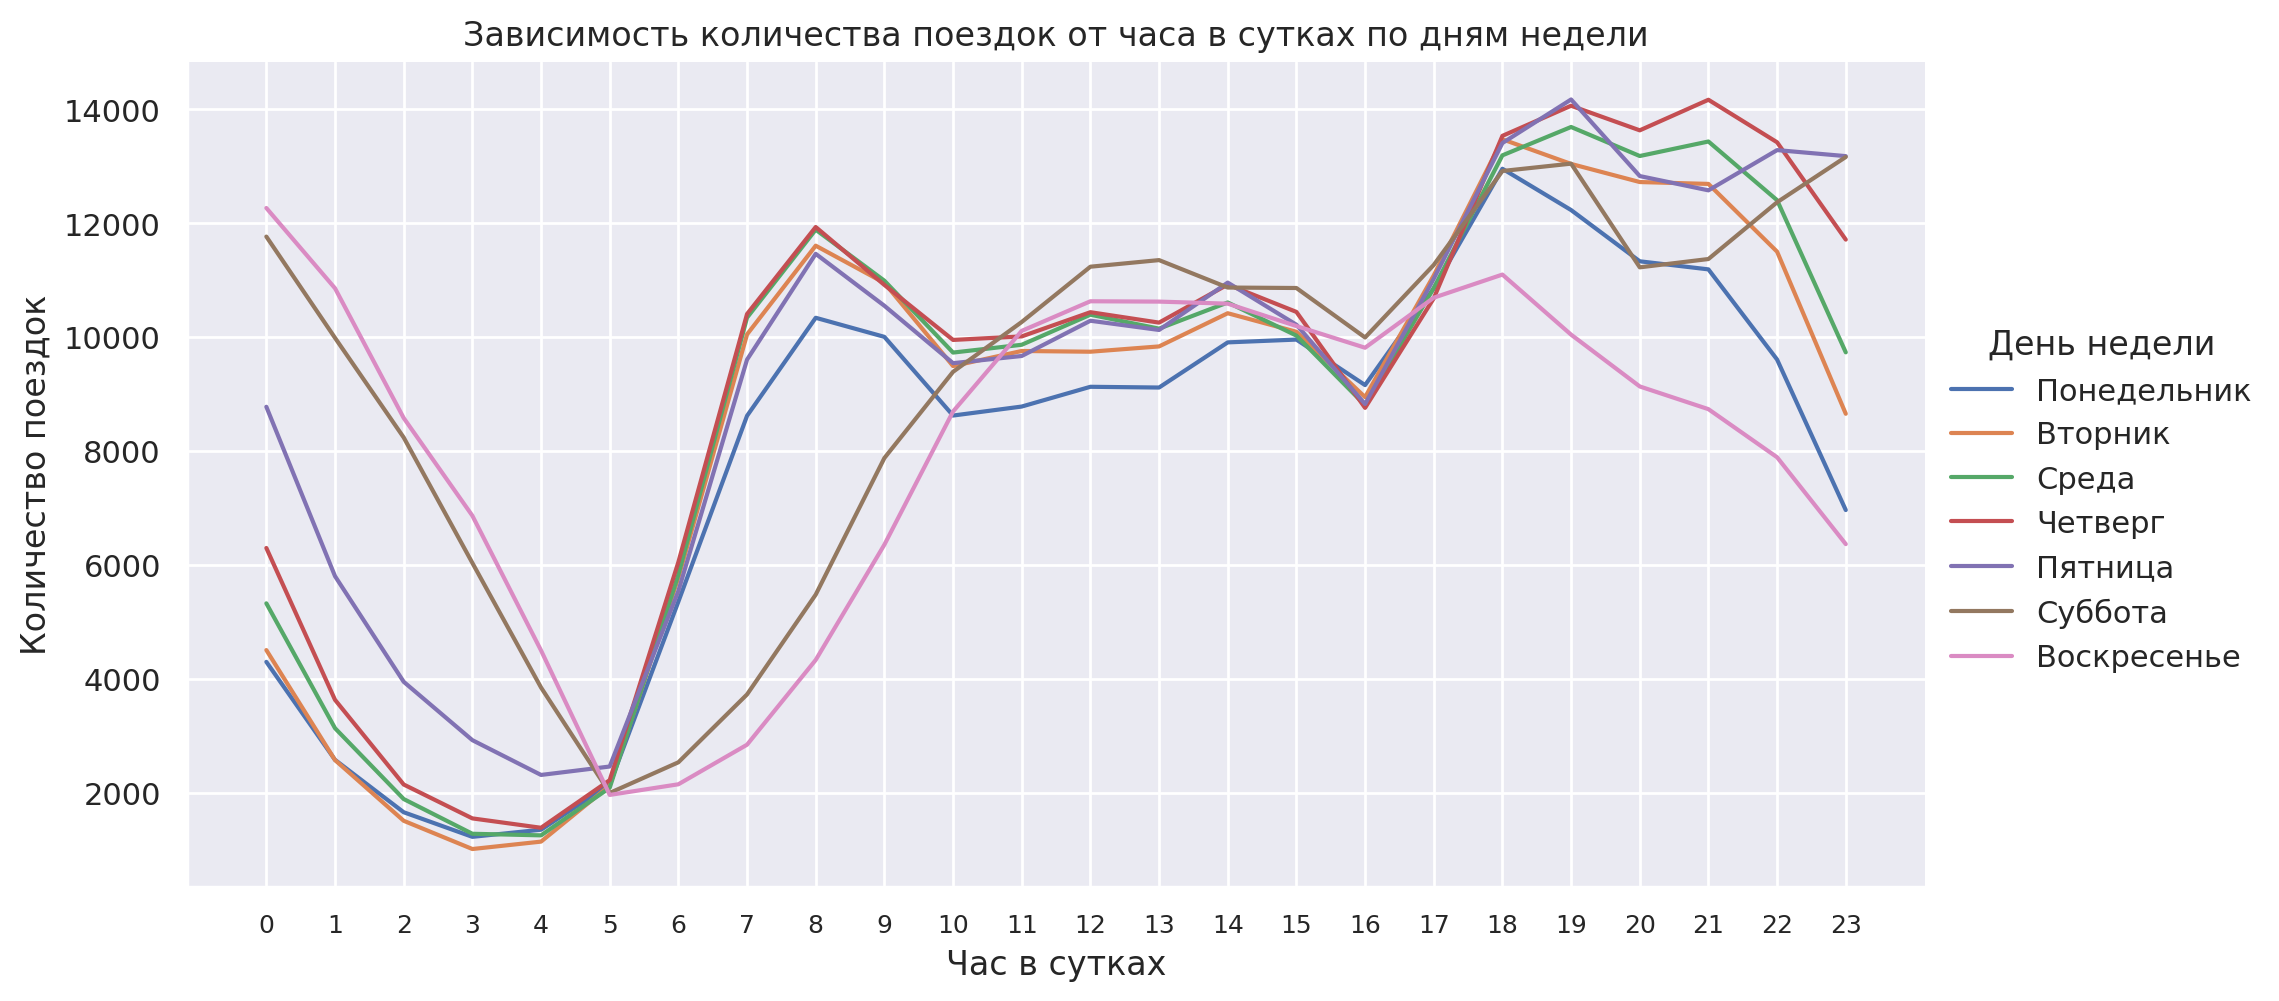

In [24]:
hour_counts_by_day = df.groupby(['pickup_day', 'pickup_hour']).size().reset_index(name='value')
hour_counts_by_day['pickup_day'] = hour_counts_by_day['pickup_day'].map(lambda x: days[x])

graph = sns.relplot(x='pickup_hour', y='value', hue='pickup_day', data=hour_counts_by_day, kind='line', height = 5, aspect = 2)

graph._legend.set_title("День недели")

plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от часа в сутках по дням недели')
plt.xticks(list(range(0, 24)), fontsize=9)

plt.show()

[Ответ на попрос ниже] Можнно сделатьв вывод о том что количество поезднок в разное время суто не сильно зависит от месяца. Разве что в зимние время нет пика в 9 вечера (возможно из-за того что люди меньше гуляют в это время)


По дням нелели основная разница видна между буднями и выходными:

В будние дни люди едут с утра на работу (пик в 8 утра), потом небольшое "плато" просадка в 16:00 и большое кол-во поездок с 18 до 22 (можно предположить, что люди едут с работы) и мальенькое количество поездок ночью с наименьшими показателями в 3 ночи и возрастанием кол-ва к утру. Причем в пятницу кол-во заказов ночью больше чем в остальные будни.

В выходные: В субботу наибольшее кол-во поезднок ночью (завтра не на завод), и практически линейно падает до 5 утра, а потом растет к 13:00. В воскресенье аналогично за исключением ночи где кол-во поездок меньше чем в будние дня



**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=32)

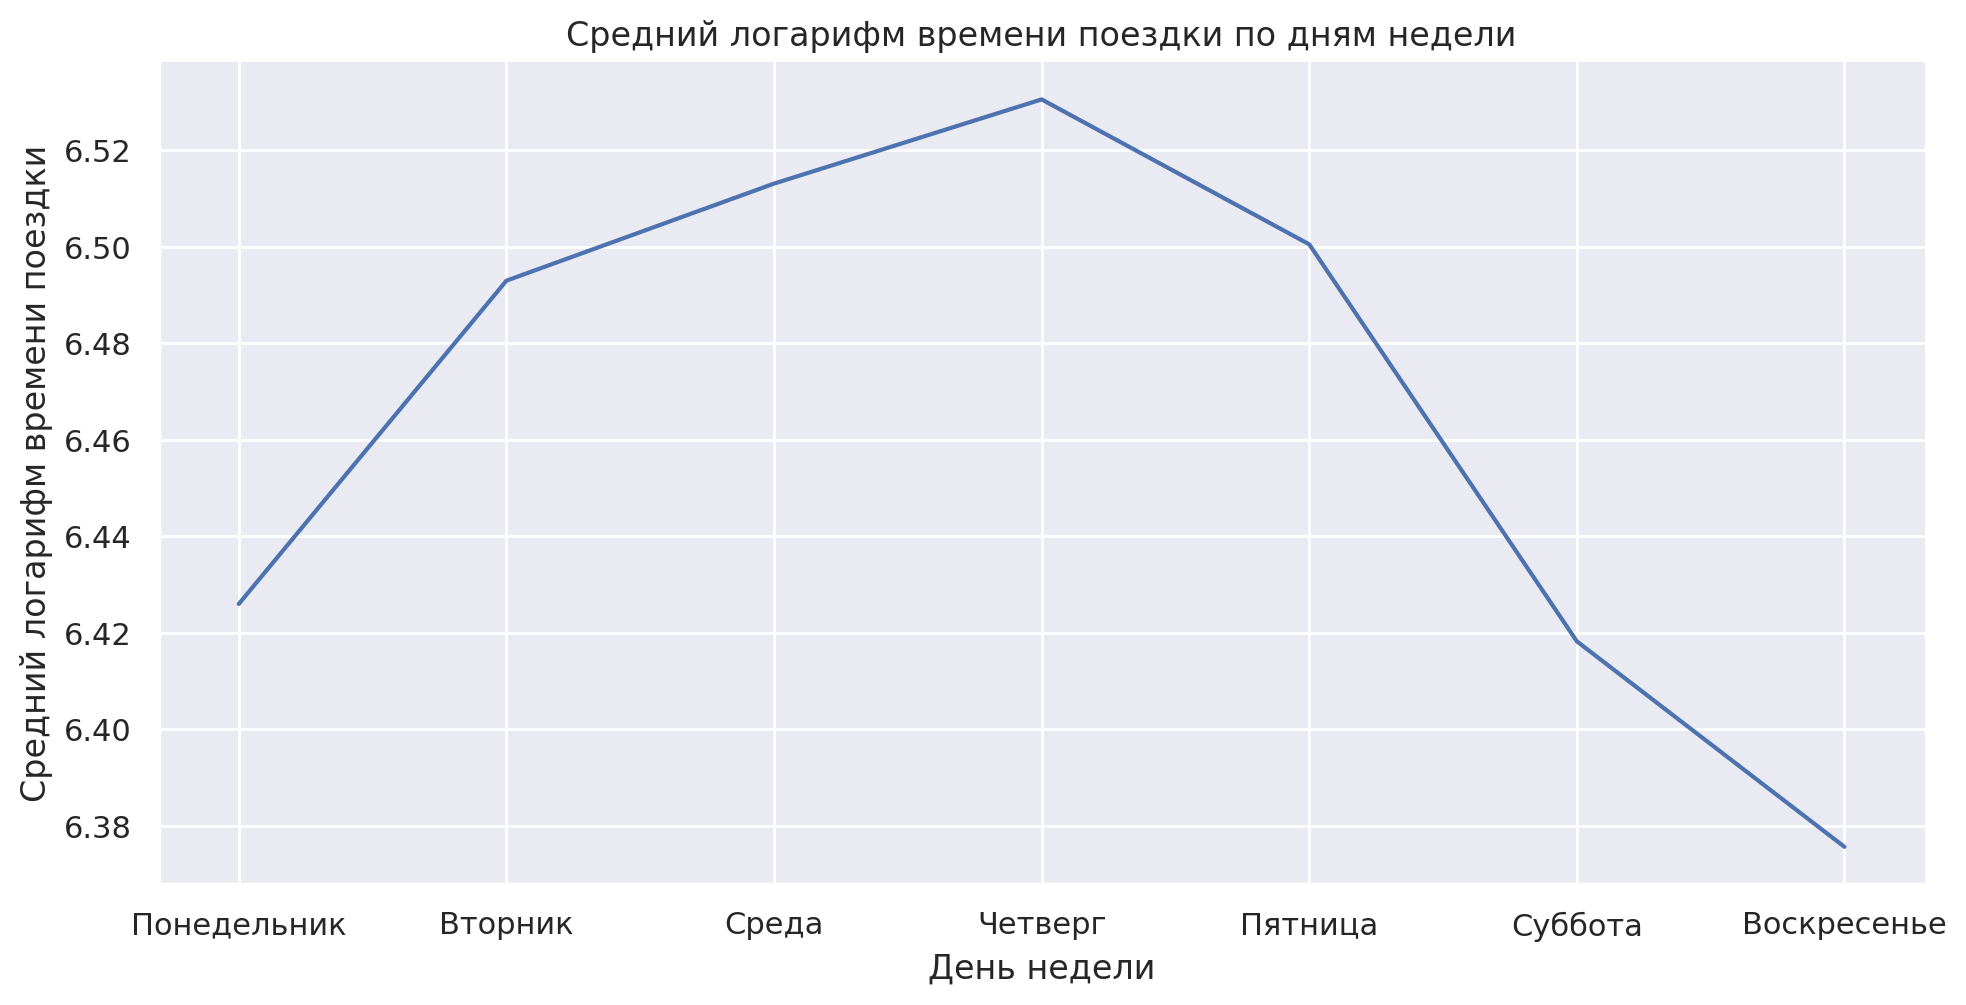

In [27]:
average_log_day = train_data.groupby('pickup_day')['log_trip_duration'].mean().reset_index(name='value')
average_log_day['pickup_day'] = average_log_day['pickup_day'].map(lambda x: days[x])

sns.relplot(x='pickup_day', y='value', data=average_log_day, kind='line', height = 5, aspect = 2)
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')
plt.title('Средний логарифм времени поездки по дням недели')
plt.show()

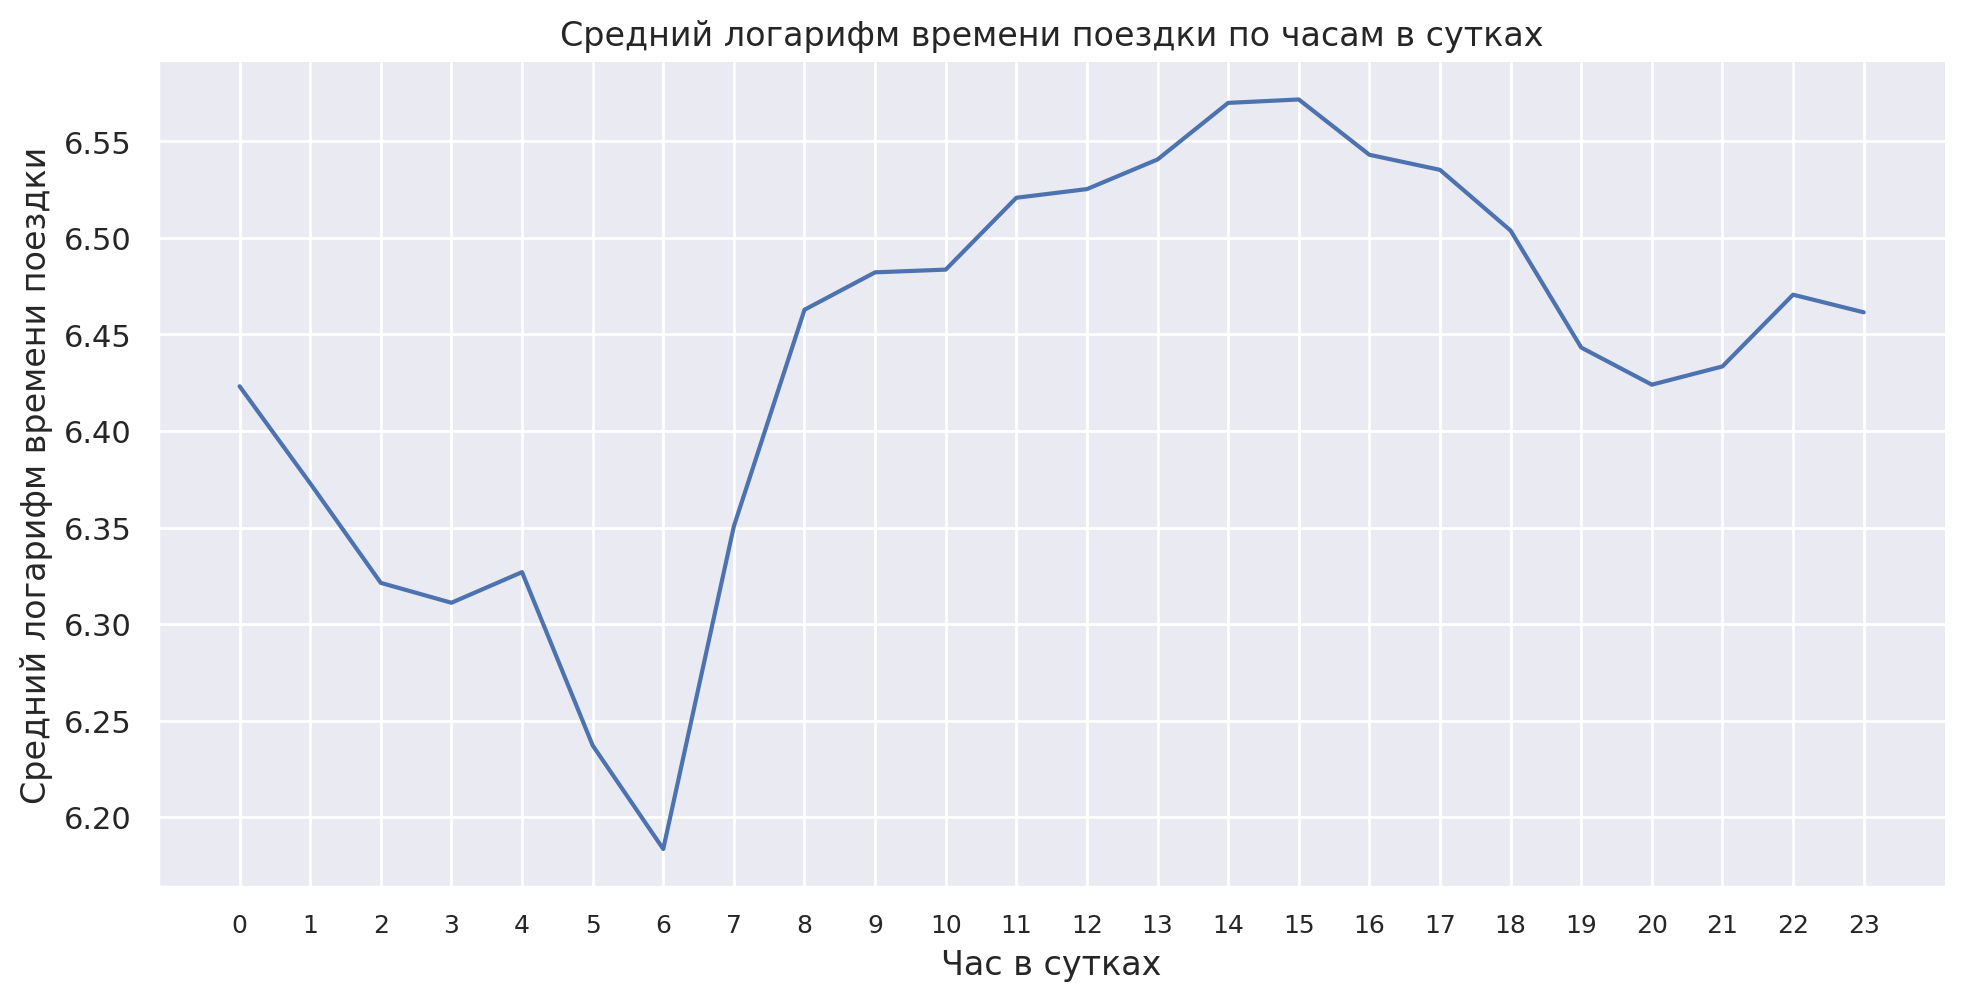

In [28]:
average_log_hour = train_data.groupby('pickup_hour')['log_trip_duration'].mean().reset_index(name='value')

sns.relplot(x='pickup_hour', y='value', data=average_log_hour, kind='line', height = 5, aspect = 2)
plt.xlabel('Час в сутках')
plt.ylabel('Средний логарифм времени поездки')
plt.title('Средний логарифм времени поездки по часам в сутках')
plt.xticks(list(range(0, 24)), fontsize=9)
plt.show()

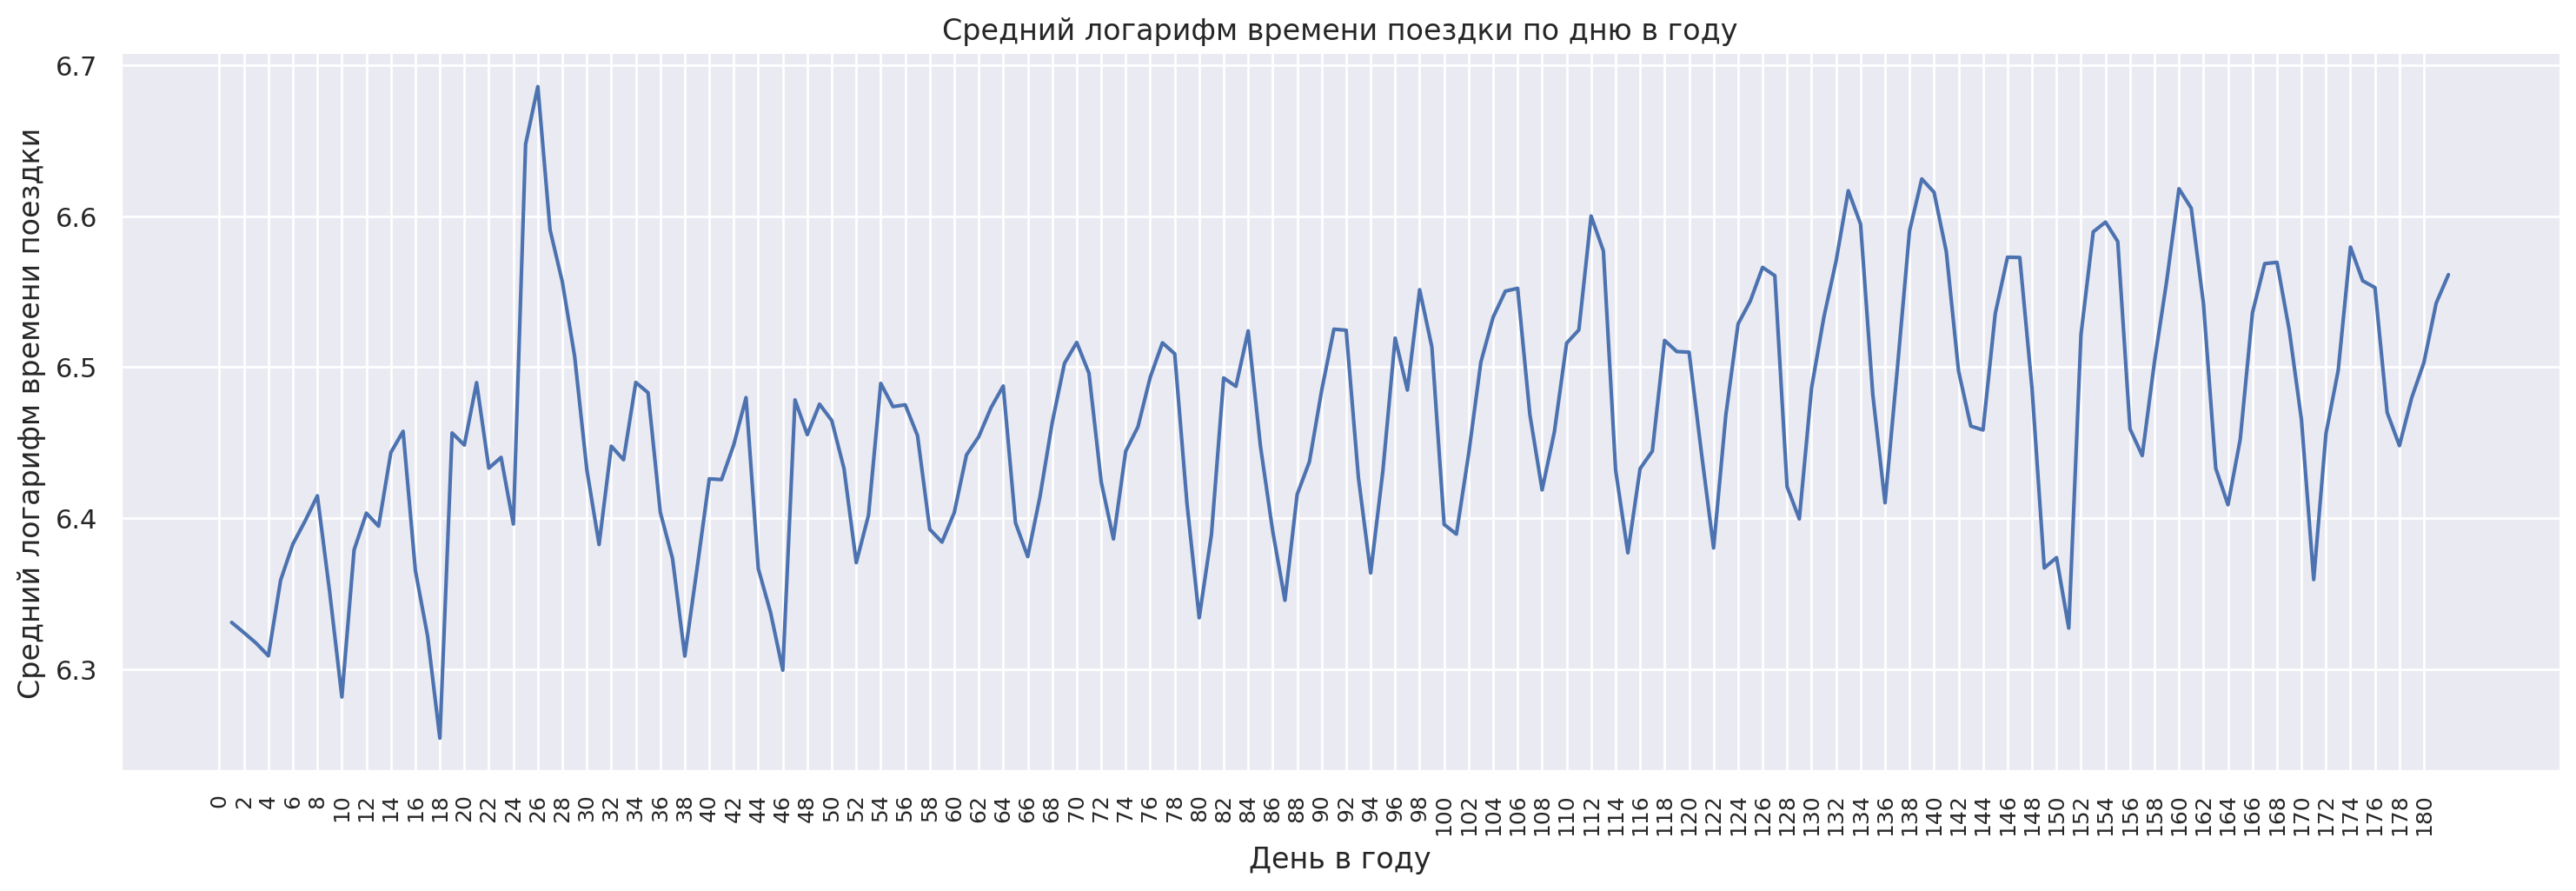

In [29]:
average_log_day_of_year = train_data.groupby('pickup_day_of_year')['log_trip_duration'].mean().reset_index(name='value')

sns.relplot(x='pickup_day_of_year', y='value', data=average_log_day_of_year, kind='line', height = 5, aspect = 3)
plt.xlabel('День в году')
plt.ylabel('Средний логарифм времени поездки')
plt.title('Средний логарифм времени поездки по дню в году')
plt.xticks(list(range(0, 182, 2)), rotation = 90, fontsize=9)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики таргета и кол-ва поездок в сутках в зависимости от дня нелели и от часа в сутках cхожи. По дням недели оба графика больше в середине недели и имеют маленькие значения в вс и пн. По часам в сутках также видны низкие показатели в 5-6 часов, рост к 8 часам и большие показатели днем.

Наверное это можно связать с тем что большинство людей заказывают такси для поездки на более длительное время. Соответсвенно маленькое кол-во заказов сильнее уменьшает кол-во более продолжительных поездок и наоборот увеличивает.


Первый аномальный период - 23 день: заметна свойственная остальным неделям просадка таргета, но в последующие дни (после разрешения движения) резкий пик таргета (возможно люди решили покинуть город). В 151 день: виден провал в продолжительности поездки - меньшее кол-во заказов, не наблюдается рост после просадки возможно из-за того что не было явного завершения "аномалии" и люди плавно восстанавливались.

В графике таргета от дня в году виден тренд на более продолжительные поездки в будние дни (аналогично зависимости по дням недели)

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [30]:
# 1 - 3, 5 сделано ранее

def addAnomaly(df):
  first_anomaly = (df['pickup_day_of_year'] >= 23) & (df['pickup_day_of_year'] <= 31)
  df['first_anomaly'] = np.where(first_anomaly, 1, 0)

  second_anomaly = (df['pickup_day_of_year'] >= 150) & (df['pickup_day_of_year'] <= 153)
  df['second_anomaly'] = np.where(second_anomaly, 1, 0)

addAnomaly(train_data)
addAnomaly(test_data)

In [31]:
test_data

id  vendor_id     pickup_datetime  passenger_count  \
1424584  id3381276          2 2016-03-15 11:48:27                5   
776841   id0662050          1 2016-03-01 12:13:48                1   
57501    id1613263          1 2016-03-15 10:39:05                2   
174398   id0758202          2 2016-05-03 15:23:19                1   
1211365  id3090052          2 2016-04-30 13:14:15                5   
...            ...        ...                 ...              ...   
14740    id0283445          2 2016-05-07 14:39:44                1   
695132   id1146151          1 2016-06-08 07:50:52                1   
505769   id2610592          1 2016-03-05 01:39:50                1   
1405598  id1109661          1 2016-01-11 08:55:45                1   
1115243  id2571647          1 2016-04-06 08:59:35                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1424584        -73.959671        40.760338         -73.964409   
776841         -73.958611        40.780804         -73.974258   
57501          -73.988205        40.743431         -74.002243   
174398         -73.977280        40.752209         -73.984734   
1211365        -73.971901        40.781689         -73.984070   
...                   ...              ...                ...   
14740          -73.993713        40.752342         -73.993713   
695132         -73.959045        40.763721         -73.975914   
505769         -73.989799        40.768761         -73.993690   
1405598        -73.964615        40.764404         -73.937943   
1115243        -73.935211        40.800564         -73.953003   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
1424584         40.768848                  N            677   
776841          40.762875                  N            969   
57501           40.739567                  N            343   
174398          40.768658                  N           1161   
1211365         40.751469                  N           1510   
...                   ...                ...            ...   
14740           40.752342                  N            597   
695132          40.758739                  N           1201   
505769          40.752151                  N            301   
1405598         40.800793                  N            494   
1115243         40.791576                  N            757   

         log_trip_duration  pickup_day_of_year  pickup_day  pickup_hour  \
1424584           6.519147                  75           1           11   
776841            6.877296                  61           1           12   
57501             5.840642                  75           1           10   
174398            7.057898                 124           1           15   
1211365           7.320527                 121           5           13   
...                    ...                 ...         ...          ...   
14740             6.393591                 128           5           14   
695132            7.091742                 160           2            7   
505769            5.710427                  65           5            1   
1405598           6.204558                  11           0            8   
1115243           6.630683                  97           2            8   

         pickup_month  first_anomaly  second_anomaly  
1424584             3              0               0  
776841              3              0               0  
57501               3              0               0  
174398              5              0               0  
1211365             4              0               0  
...               ...            ...             ...  
14740               5              0               0  
695132              6              0               0  
505769              3              0               0  
1405598             1              0               0  
1115243             4              0               0  

[437594 rows x 17 columns]

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальные: все добавленные

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [33]:
features = ['pickup_day_of_year', 'pickup_day', 'pickup_month', 'pickup_hour', 'first_anomaly', 'second_anomaly']

X_train = train_data[features]
y_train = train_data['log_trip_duration']
X_test = test_data[features]
y_test = test_data['log_trip_duration']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(rmsle(y_test, y_pred))

0.7880342791652888


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [34]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [35]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [36]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Выделяются такие точки как New York Penn Station, Broadway, LaGuardia Airport (большрое кол-во остановок и начала поездок)

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [37]:
earth_radius = 6371
def haversine(lat_1, lon_1, lat_2, lon_2):
    delta_lat = np.radians(lat_2 - lat_1)
    delta_lon = np.radians(lon_2 - lon_1)

    temp_sin = np.sin(delta_lat / 2)
    temp = temp_sin * temp_sin + np.cos(np.radians(lat_1)) * np.cos(np.radians(lat_2)) * np.sin(delta_lon / 2) * np.sin(delta_lon / 2)
    angle = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1 - temp))

    return earth_radius * angle

df['haversine'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [38]:
df['log_haversine'] =  np.log1p(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [39]:
your_df = df
print(your_df['log_haversine'].corr(your_df['log_trip_duration']))
print(your_df['haversine'].corr(your_df['log_trip_duration']))
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

0.7498822373942499
0.5735948311180148


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

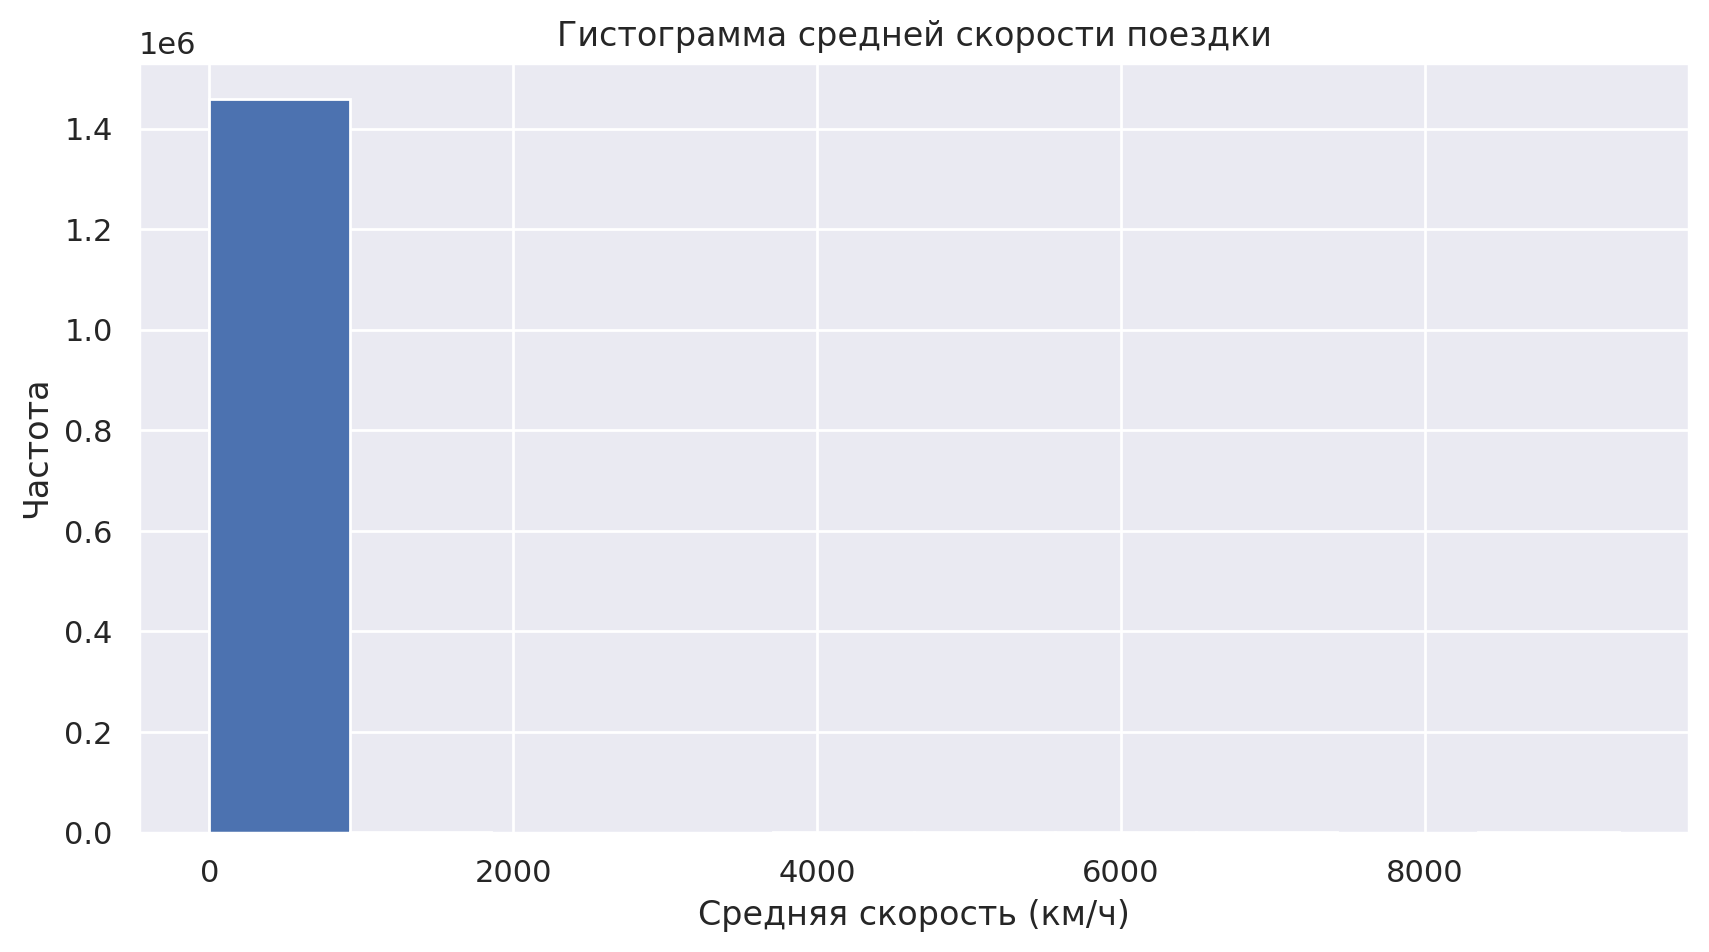

In [40]:
df['average_speed'] = df['haversine'] / (df['trip_duration'] / 3600)

plt.figure(figsize=(10, 5))
plt.hist(df['average_speed'])
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.title('Гистограмма средней скорости поездки')
plt.grid(True)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

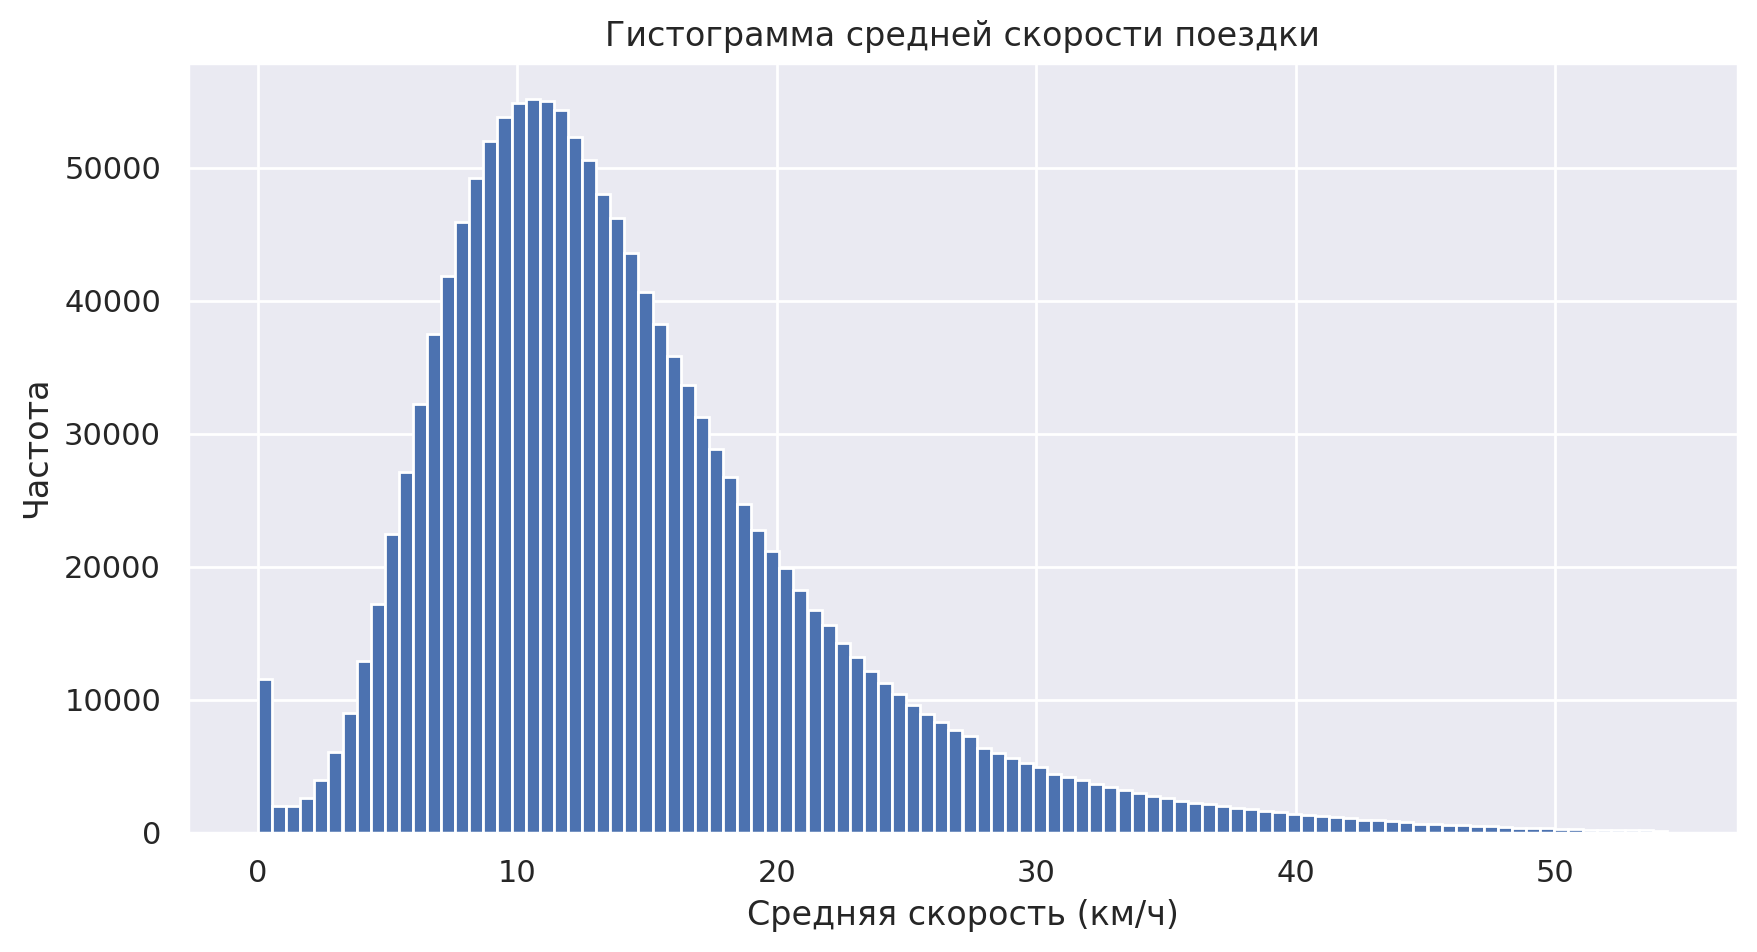

In [41]:
q = df['average_speed'].quantile(0.999)
clear_df = df[df['average_speed'] <= q]

plt.figure(figsize=(10, 5))
plt.hist(clear_df['average_speed'], bins=100)
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.title('Гистограмма средней скорости поездки')
plt.grid(True)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

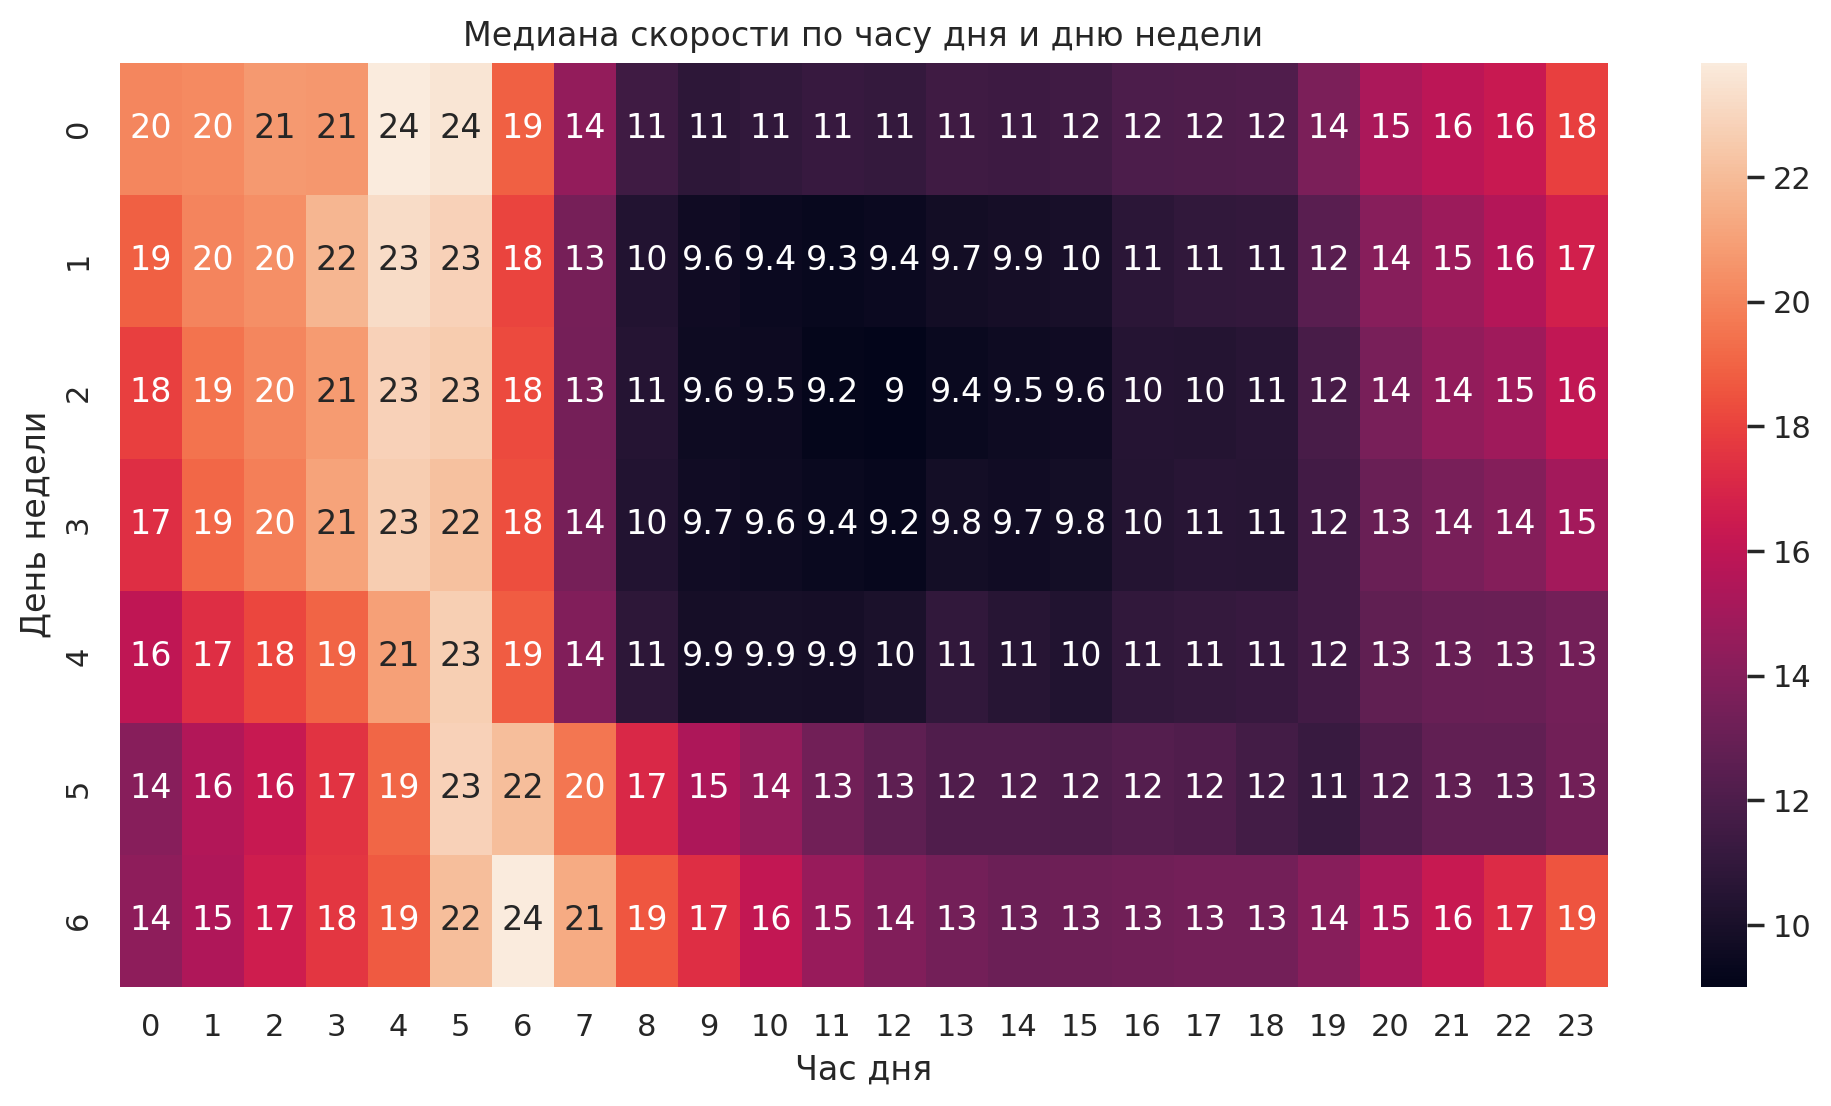

In [42]:
median_speeds = df.groupby(['pickup_day', 'pickup_hour'])['average_speed'].median().reset_index()
median_speed_matrix = median_speeds.pivot(index='pickup_day', columns='pickup_hour', values='average_speed')

plt.figure(figsize=(12, 6))
sns.heatmap(median_speed_matrix, annot=True)
plt.xlabel('Час дня')
plt.ylabel('День недели')
plt.title('Медиана скорости по часу дня и дню недели')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [43]:
df.drop(columns=['average_speed'], inplace=True)

Нельзя из-за мультиколлинеарности (т.к. уже используем расстояние). Она может приводить к неустойчивости коэфициентов и некорректной моделе

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Скорость минимальна в будние дни в 11 часов дня и максимальна в 5-6 часов выходных.

In [44]:
def addLoad(df):
  high_load = (df['pickup_hour'] >= 9) & (df['pickup_hour'] <= 13) & (df['pickup_day'] >= 1) & (df['pickup_day'] <= 4)
  df['high_load'] = np.where(high_load, 1, 0)

  low_load = (df['pickup_hour'] >= 3) & (df['pickup_hour'] <= 5) & (df['pickup_day'] >= 0) & (df['pickup_day'] <= 4)
  low_load |= (df['pickup_hour'] >= 5) & (df['pickup_hour'] <= 7) & (df['pickup_day'] >= 5) & (df['pickup_day'] <= 6)
  df['low_load'] = np.where(high_load, 1, 0)

addLoad(df)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [45]:
points = {'penn_station': (40.750, 40.752, -73.995, -73.993),
          'broadway': (40.762, 40.764, -73.984, -73.982),
          'laguardia_airport': (40.759, 40.781, -73.883, -73.861)}

def addPoint(name, point):
  df[name + "_start"] = ((df["pickup_latitude"] >= point[0]) & (df["pickup_latitude"] <= point[1]) &
                                (df["pickup_longitude"] >= point[2]) & (df["pickup_longitude"] <= point[3]))
  df[name + "_end"] = ((df["dropoff_latitude"] >= point[0]) & (df["dropoff_latitude"] <= point[1]) &
                            (df["dropoff_longitude"] >= point[2]) & (df["dropoff_longitude"] <= point[3]))

for name in points:
  addPoint(name, points[name])


In [46]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  haversine  \
0               40.765602                  N            455  ...   1.498521   
1               40.731152                  N            663  ...   1.805507   
2               40.710087                  N           2124  ...   6.385098   
3               40.706718                  N            429  ...   1.485498   
4               40.782520                  N            435  ...   1.188588   
...                   ...                ...            ...  ...        ...   
1458639         40.740170                  N            778  ...   1.225080   
1458640         40.796547                  N            655  ...   6.049836   
1458641         40.707371                  N            764  ...   7.824606   
1458642         40.757107                  N            373  ...   1.092564   
1458643         40.790585                  N            198  ...   1.134042   

         log_haversine  high_load  low_load  penn_station_start  \
0             0.915699          0         0               False   
1             1.031584          0         0               False   
2             1.999464          1         1               False   
3             0.910473          0         0               False   
4             0.783257          0         0               False   
...                ...        ...       ...                 ...   
1458639       0.799793          1         1               False   
1458640       1.953004          0         0               False   
1458641       2.177544          0         0               False   
1458642       0.738390          0         0               False   
1458643       0.758018          0         0               False   

         penn_station_end  broadway_start  broadway_end  \
0                   False           False         False   
1                   False           False         False   
2                   False           False         False   
3                   False           False         False   
4                   False           False         False   
...                   ...             ...           ...   
1458639             False           False         False   
1458640             False           False         False   
1458641             False           False         False   
1458642             False           False         

Эти признаки могут быть полезны т.к. показывают принадлежность заказов к самым нагруженным маршрутам, что является еще одним фактором длины поездки.

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

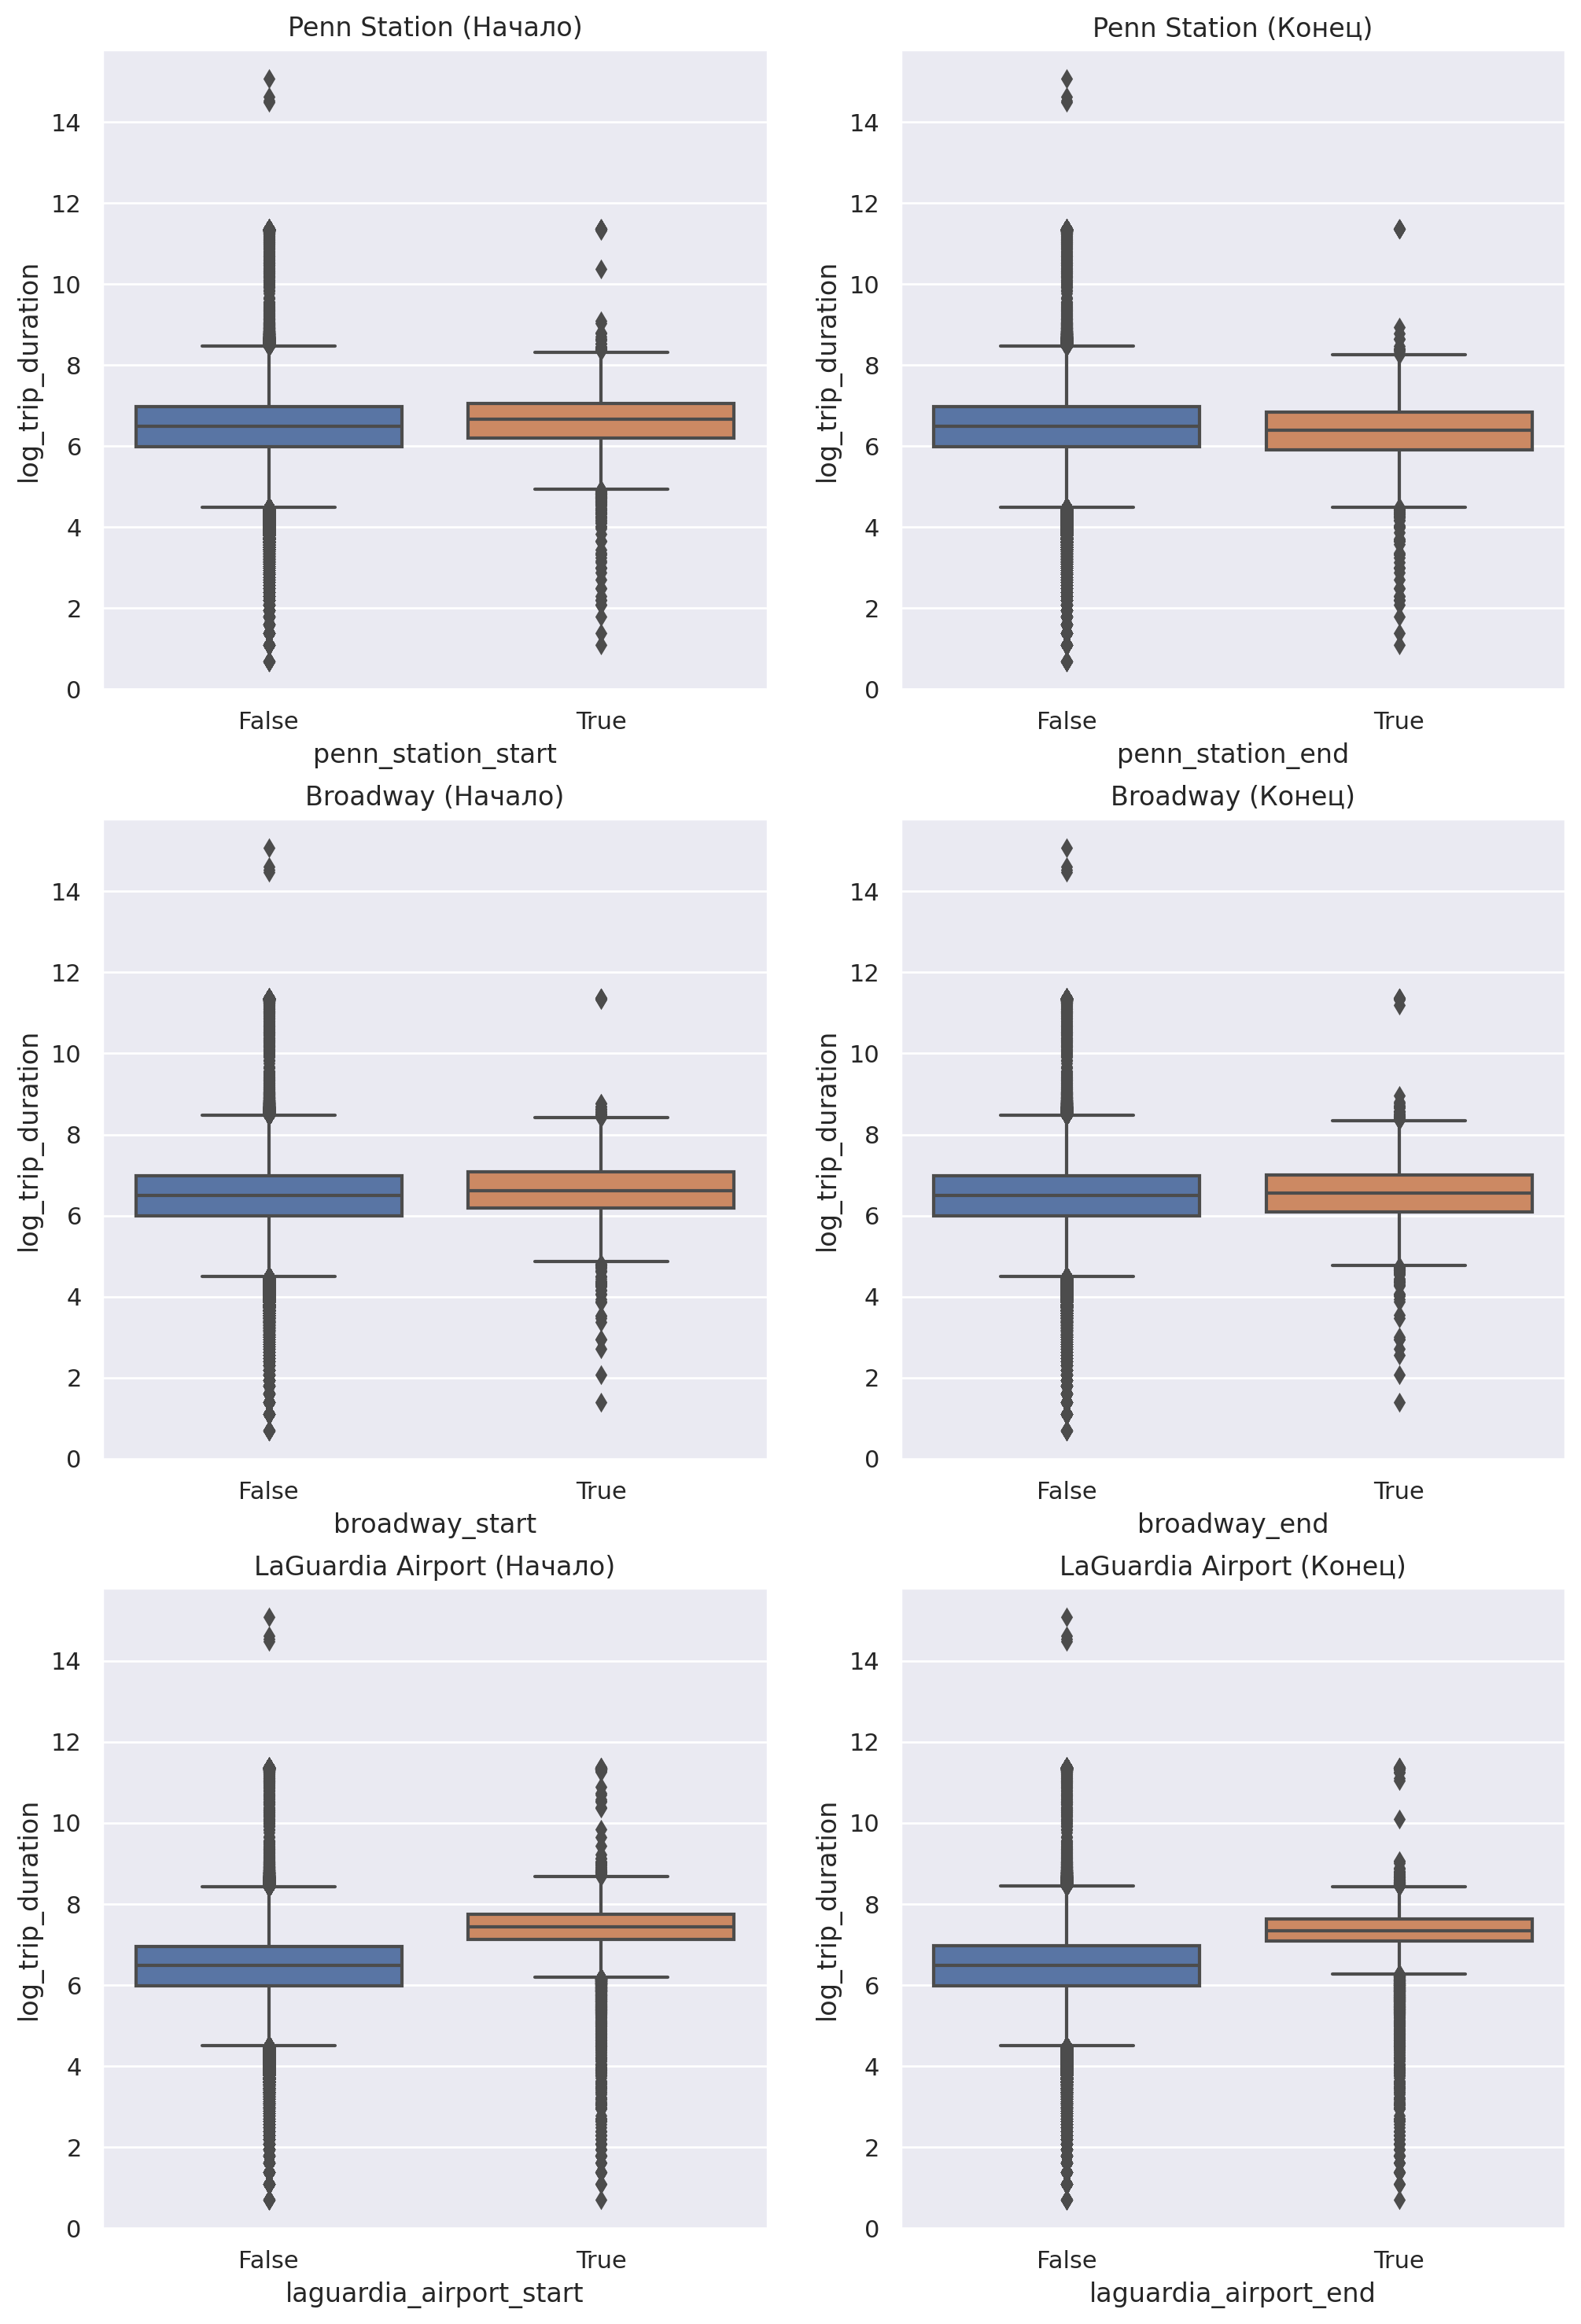

In [48]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

sns.boxplot(x="penn_station_start", y="log_trip_duration", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Penn Station (Начало)")

sns.boxplot(x="penn_station_end", y="log_trip_duration", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Penn Station (Конец)")

sns.boxplot(x="broadway_start", y="log_trip_duration", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Broadway (Начало)")

sns.boxplot(x="broadway_end", y="log_trip_duration", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Broadway (Конец)")

sns.boxplot(x="laguardia_airport_start", y="log_trip_duration", data=df, ax=axes[2, 0])
axes[2, 0].set_title("LaGuardia Airport (Начало)")

sns.boxplot(x="laguardia_airport_end", y="log_trip_duration", data=df, ax=axes[2, 1])
axes[2, 1].set_title("LaGuardia Airport (Конец)")


plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Графики примерно схожи между собой, то есть отображают самые частые маршруты

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.n_row = 100
        self.n_col = 100
        self.lat_min = 40.675
        self.lat_max = 40.825
        self.lon_min = -74
        self.lon_max = -73.9

        self.range_row = np.linspace(self.lat_min, self.lat_max, self.n_row + 1)
        self.range_col = np.linspace(self.lon_min, self.lon_max, self.n_col + 1)


    def fit(self, X=None, y=None):
        return self

    def transform(self, X, y=None):
        X_temp =  X.copy()

        pickup_row = np.digitize(X_temp["pickup_latitude"], self.range_row, right=False) - 1
        pickup_col = np.digitize(X_temp["pickup_longitude"], self.range_col, right=False) - 1

        dropoff_row = np.digitize(X_temp["dropoff_latitude"], self.range_row, right=False) - 1
        dropoff_col = np.digitize(X_temp["dropoff_longitude"], self.range_col, right=False) - 1

        pickup_cell = self.n_row * pickup_row + pickup_col
        dropoff_cell = self.n_row * dropoff_row + dropoff_col
        pickup_cell[(pickup_row == -1) | (pickup_row == self.n_row) | (pickup_col == -1) | (pickup_col == self.n_col)] = -1
        dropoff_cell[(dropoff_row == -1) | (dropoff_row == self.n_row) | (dropoff_col == -1) | (dropoff_col == self.n_col)] = -1

        X_temp["pickup_cell"] = pickup_cell
        X_temp["dropoff_cell"] = dropoff_cell

        return X_temp

In [50]:
tfr = MapGridTransformer()
df = tfr.transform(df)

In [51]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  high_load  \
0               40.765602                  N            455  ...          0   
1               40.731152                  N            663  ...          0   
2               40.710087                  N           2124  ...          1   
3               40.706718                  N            429  ...          0   
4               40.782520                  N            435  ...          0   
...                   ...                ...            ...  ...        ...   
1458639         40.740170                  N            778  ...          1   
1458640         40.796547                  N            655  ...          0   
1458641         40.707371                  N            764  ...          0   
1458642         40.757107                  N            373  ...          0   
1458643         40.790585                  N            198  ...          0   

         low_load  penn_station_start  penn_station_end  broadway_start  \
0               0               False             False           False   
1               0               False             False           False   
2               1               False             False           False   
3               0               False             False           False   
4               0               False             False           False   
...           ...                 ...               ...             ...   
1458639         1               False             False           False   
1458640         0               False             False           False   
1458641         0               False             False           False   
1458642         0               False             False           False   
1458643         0               False             False           False   

         broadway_end  laguardia_airport_start  laguardia_airport_end  \
0               False                    False                  False   
1               False                    False                  False   
2               False                    False                  False   
3               False                    False                  False   
4               False                    False                  False   
...               ...                      ...                    ...   
1458639         False            

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [52]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=32)
addAnomaly(train_data)
addAnomaly(test_data)

In [55]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerogical = ['log_haversine']
categorical = ['pickup_day_of_year',
            'pickup_day',
            'pickup_month',
            'pickup_hour',

            'first_anomaly',
            'second_anomaly',

            'high_load',
            'low_load',

            'penn_station_start',
            'penn_station_end',
            'broadway_start',
            'broadway_end',
            'laguardia_airport_start',
            'laguardia_airport_end',

            'pickup_cell',
            'dropoff_cell',
]
features = numerogical + categorical

X_train = train_data[features]
y_train = train_data['log_trip_duration']
X_test = test_data[features]
y_test = test_data['log_trip_duration']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerogical),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(rmsle(y_test, y_pred))

0.47569855681625944


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным. `store_and_fwd_flag` связан с качеством сети, а следовательно с работой навигатора и маршрутом.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

Разные поставщики могут иметь разные парки и услуги. Кол-во пассажиров влияет на время посадку и высадку.

In [56]:
print(df['vendor_id'].nunique())
print(df['passenger_count'].nunique())
print(df['store_and_fwd_flag'].nunique())

2
10
2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

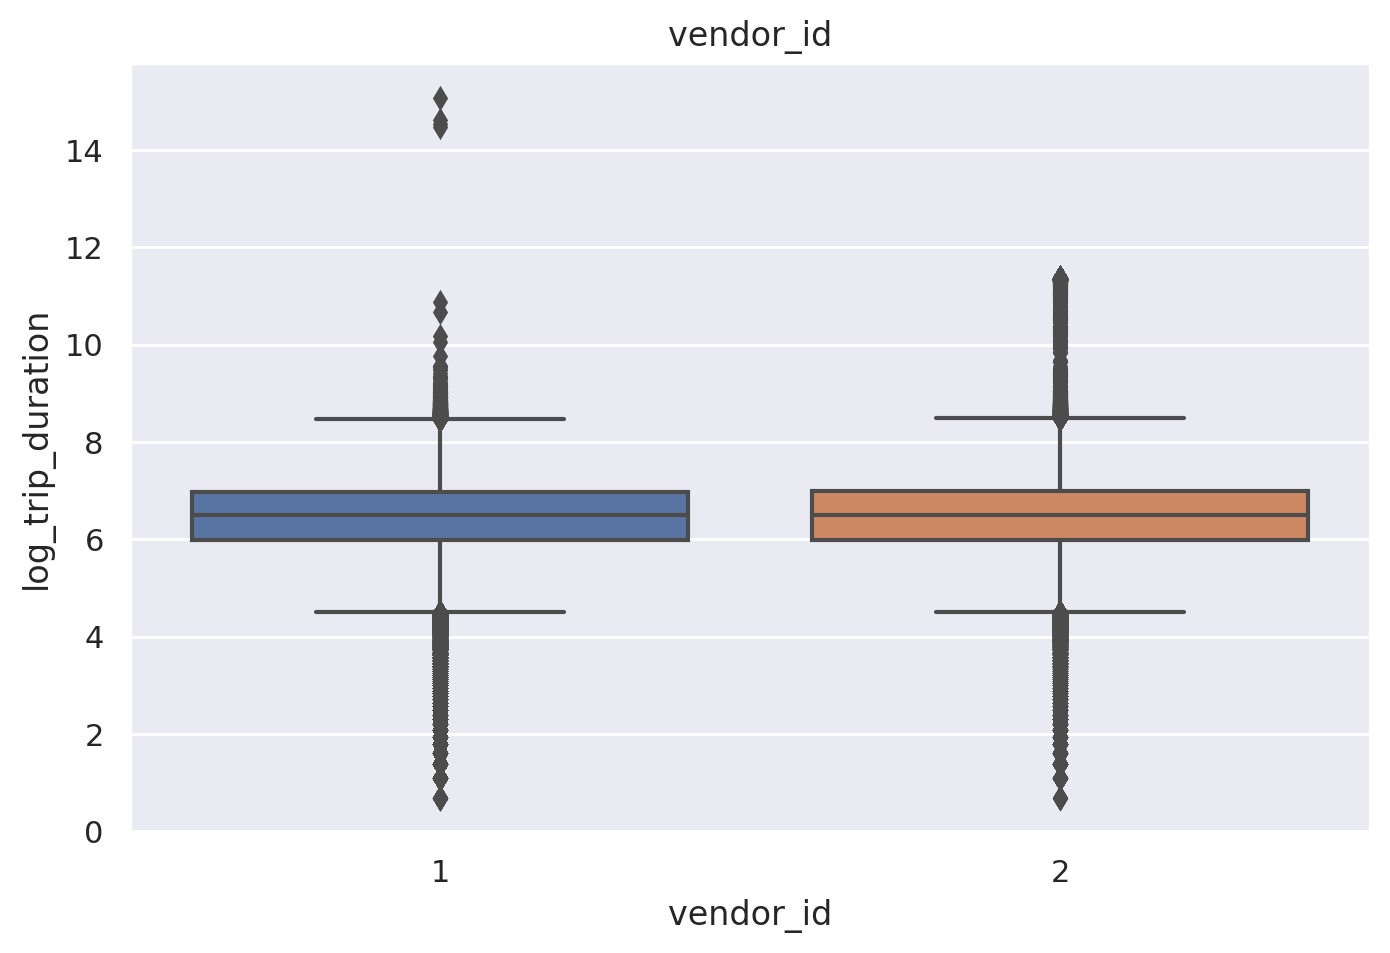

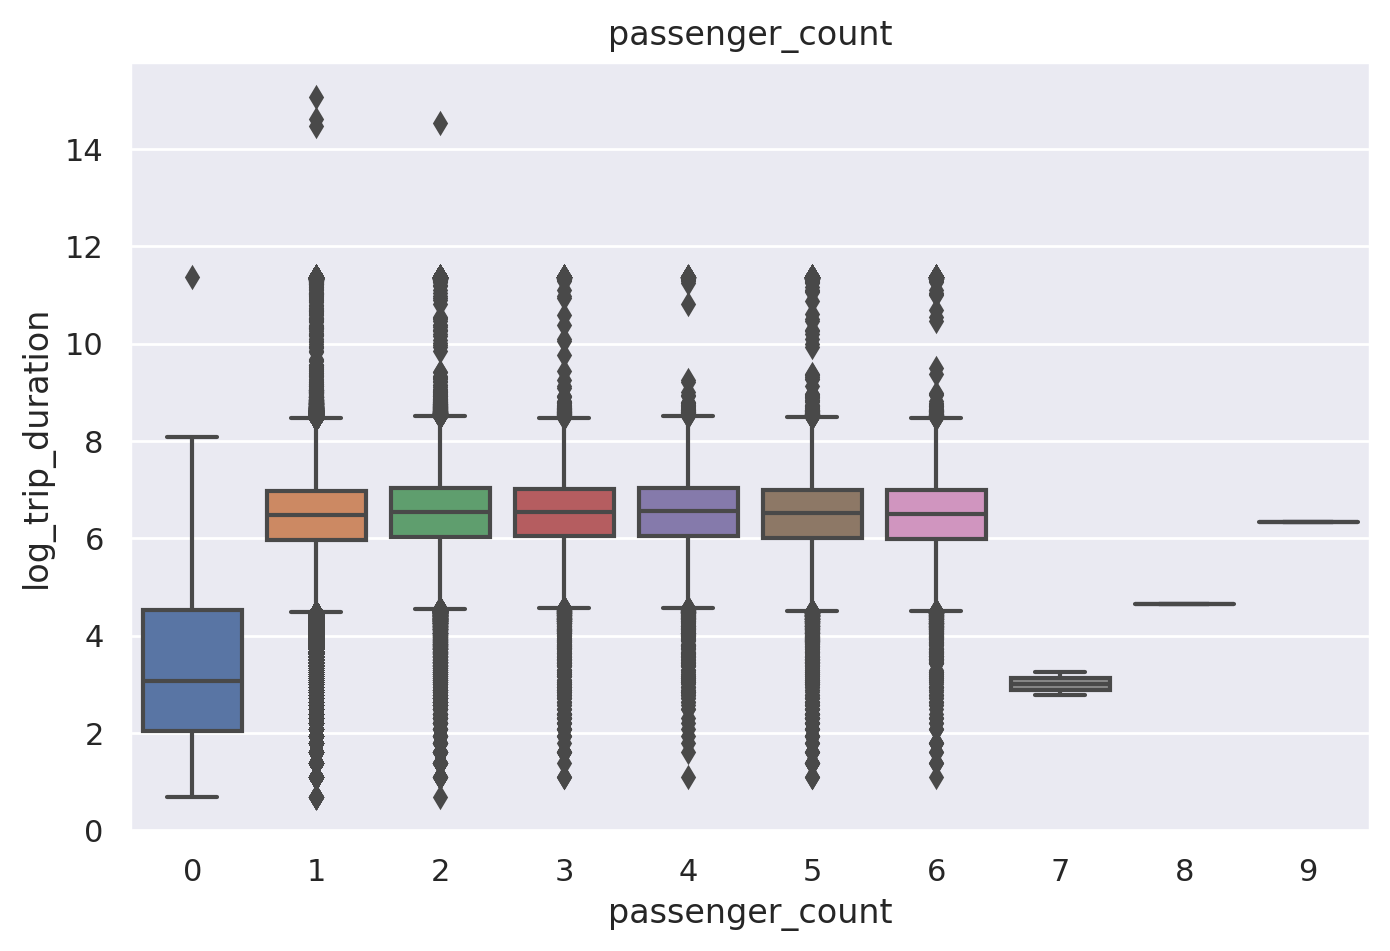

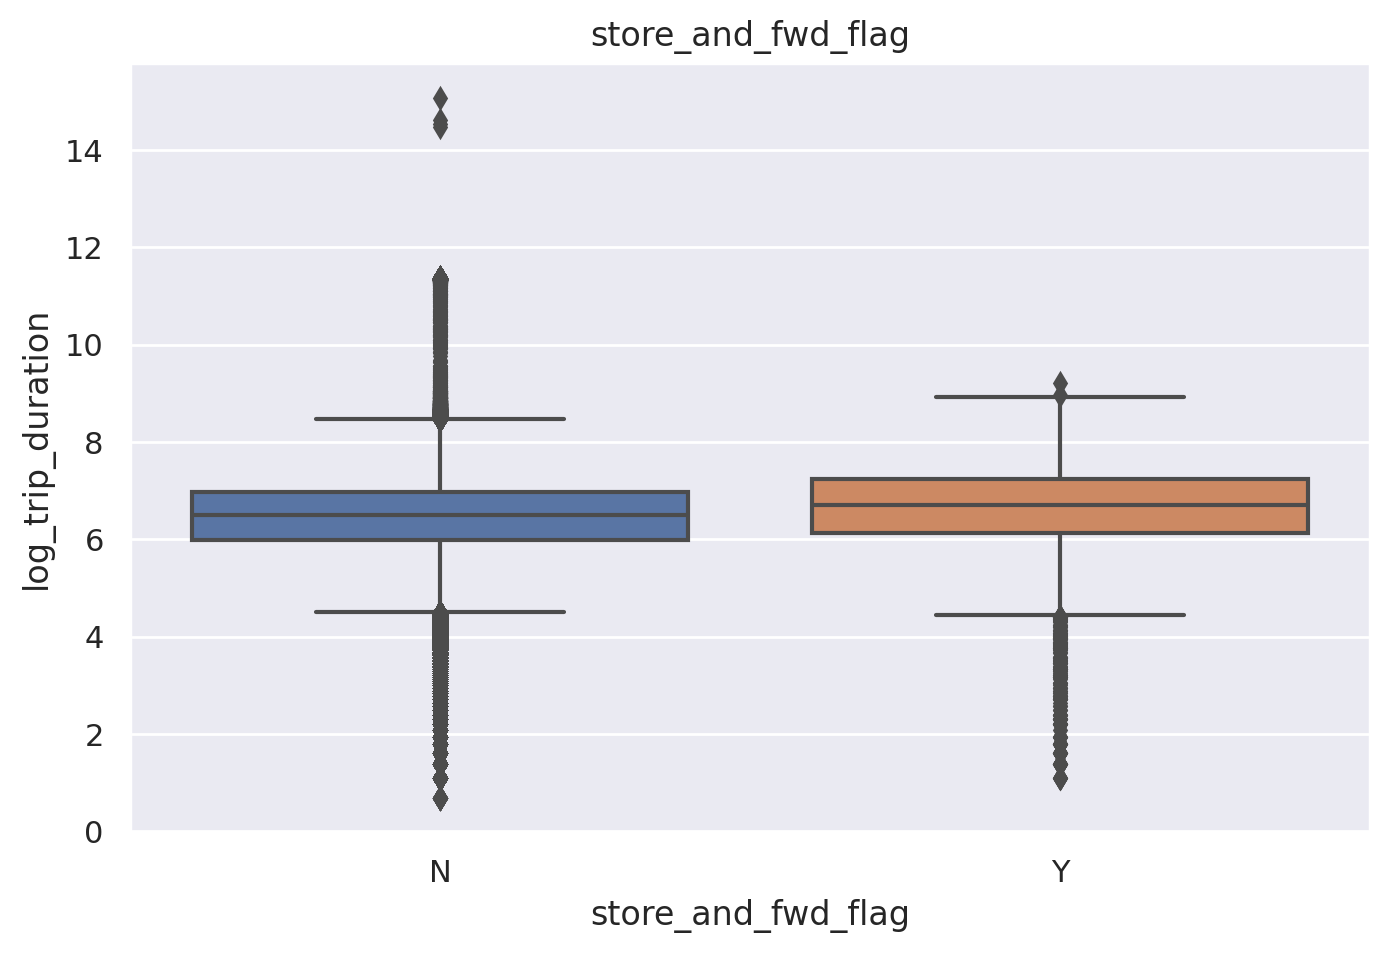

In [65]:
sns.boxplot(x="vendor_id", y="log_trip_duration", data=df)
plt.title("vendor_id")
plt.show()

sns.boxplot(x="passenger_count", y="log_trip_duration", data=df)
plt.title("passenger_count")
plt.show()


sns.boxplot(x="store_and_fwd_flag", y="log_trip_duration", data=df)
plt.title("store_and_fwd_flag")
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [66]:
df['vendor_id'] = df['vendor_id'].replace({'1': 0, '2': 1})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

При разных `vendor_id` - распределения примерно одинаковые (несильный признак). По `store_and_fwd_flag` изменения только в выбросах (несильный). По `passenger_count` разница видна только при 0 пассажирах (несильный)

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [67]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=32)
addAnomaly(train_data)
addAnomaly(test_data)

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerogical = ['log_haversine', 'passenger_count']
categorical = ['pickup_day_of_year',
            'pickup_day',
            'pickup_month',
            'pickup_hour',

            'first_anomaly',
            'second_anomaly',

            'high_load',
            'low_load',

            'penn_station_start',
            'penn_station_end',
            'broadway_start',
            'broadway_end',
            'laguardia_airport_start',
            'laguardia_airport_end',

            'pickup_cell',
            'dropoff_cell',

            'vendor_id',
            'store_and_fwd_flag',
]
features = numerogical + categorical

X_train = train_data[features]
y_train = train_data['log_trip_duration']
X_test = test_data[features]
y_test = test_data['log_trip_duration']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerogical),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(rmsle(y_test, y_pred))

0.4754970346587857


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [68]:
df.drop(columns=['vendor_id'], inplace=True)
df.drop(columns=['passenger_count'], inplace=True)
df.drop(columns=['store_and_fwd_flag'], inplace=True)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.